# 4.1.1 - Matplotlib & Seaborn.

En Python podemos realizar visualizaciones de todo tipo. En esta clase veremos algunas herramientas que nos permitirán crear gráficos. Algunos ejemplos:


![cuadrados](../../images/cuadrados.png)


![julia](../../images/julia.png)


![mandelbrot](../../images/mandelbrot.png)

$$$$

Esto no es nuestro objetivo. 

En realidad, nuestros objetivos son dos, en primer lugar visualizar los datos para realizar un análisis exploratorio de los datos, EDA por las siglas en inglés. Necesitamos describir correctamente los datos y la visualización es una gran herramienta para ello. Nuestro segundo objetivo es representar los datos de tal manera que tengan narrativa, que podamos contar una historia a través de ellos. Es lo que se llama storytelling.

**¿Qué es storytelling?**

Es una técnica que utiliza datos para contar una historia. Es una forma útil de presentar información, lo que significa que se puede utilizar tanto con audiencias internas como externas. Si estás realizando la presentación de un informe, por ejemplo, puedes expresar mejor una idea o explicar mejor un punto si utilizas gráficos, tablas o infografías, ya que dichos contenidos retienen la atención de tu audiencia de una manera que un texto o incluso un video no lo pueden hacer. Estas herramientas facilitan el procesamiento de toda la información a la vez y la toma de decisiones.

El storytelling va más allá de representar datos de una manera más atractiva. Consiste en mostrar cómo o por qué los datos cambiaron durante un período, y para eso es necesario reunir:

+ una narrativa
+ un contexto
+ personajes

Estos son los factores clave para que tu audiencia se involucre realmente con el contenido.

$$$$

Comenzaremos repasando algunos gráficos que más utilizaremos para realizar EDAs.

**Matplotlib/Pylab - Seaborn**

Antes de comenzar como siempre importaremos las librerías necesarias para poder trabajar en nuestro notebook

In [5]:
#libreria que nos permite movernos por carpetas
import os

#Librerias para poder obtener datos
import numpy as np
import pandas as pd


#librerías de visualización
import pylab as plt
import seaborn as sns

# Establecemos ciertos parámetros por defecto de nuestros gráficos
plt.rcParams['figure.figsize']=(20, 10)  # tamaño por defecto para los plots



In [2]:
df = pd.read_csv('../../../data/video_games_sales.csv', )

df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Siempre antes de empezar a crear gráficos, lo primero que debemos hacer es realizar un ánalisis de nuestros datos y ver como están distribuidos, para ello utilizaremos el método de pandas describe(), que nos devolverá una descripción estadística de nuestros datos.

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,16717,11562,Need for Speed: Most Wanted,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform,16719,31,PS2,2161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year_of_Release,16450.0,NaN,NaN,NaN,2006.487356,5.878995,1980.0,2003.0,2007.0,2010.0,2020.0
Genre,16717,12,Action,3370,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Publisher,16665,581,Electronic Arts,1356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA_Sales,16719.0,NaN,NaN,NaN,0.26333,0.813514,0.0,0.0,0.08,0.24,41.36
EU_Sales,16719.0,NaN,NaN,NaN,0.145025,0.503283,0.0,0.0,0.02,0.11,28.96
JP_Sales,16719.0,NaN,NaN,NaN,0.077602,0.308818,0.0,0.0,0.0,0.04,10.22
Other_Sales,16719.0,NaN,NaN,NaN,0.047332,0.18671,0.0,0.0,0.01,0.03,10.57
Global_Sales,16719.0,NaN,NaN,NaN,0.533543,1.547935,0.01,0.06,0.17,0.47,82.53


Seguidamente veremos si contiene nulos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


## Lineplot

Gráfico más simple que podemos usar, sirve para pintar una línea

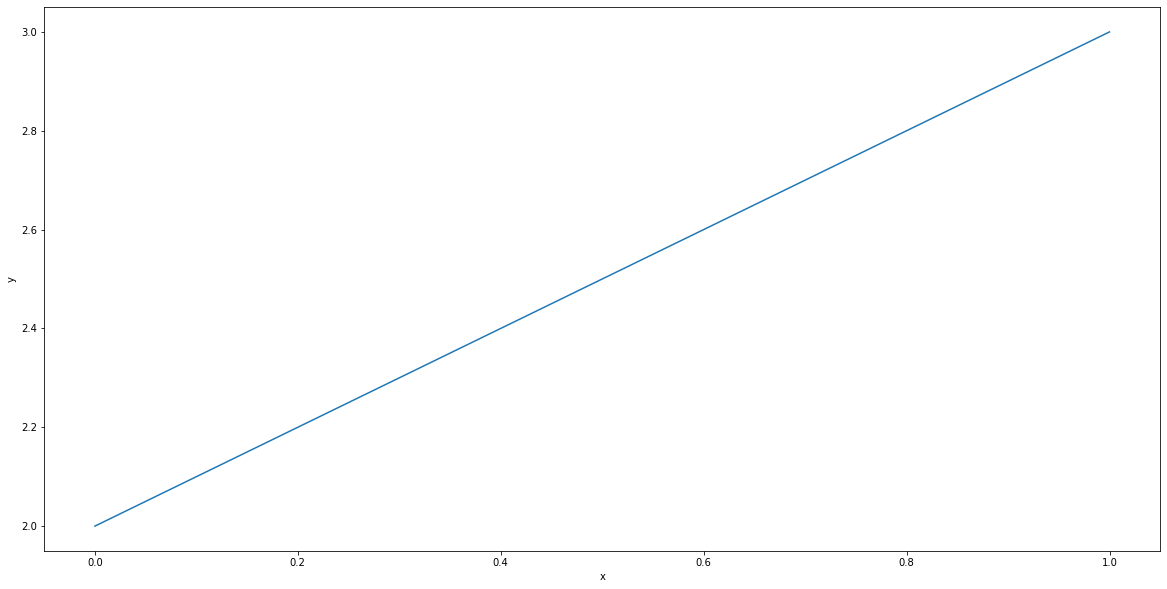

In [9]:
x=[np.random.random() for i in range(10000)]
y = [i+2 for i in x]
prueba = pd.DataFrame()
prueba['x'] = x
prueba['y'] = y
sns.lineplot(data = prueba, x ='x', y='y');
plt.show();

Podemos cambiar los estilos de los gráficos con el parámetro style

In [10]:
plt.style.use('classic')
plt.rcParams['figure.figsize']=(20, 10)

''

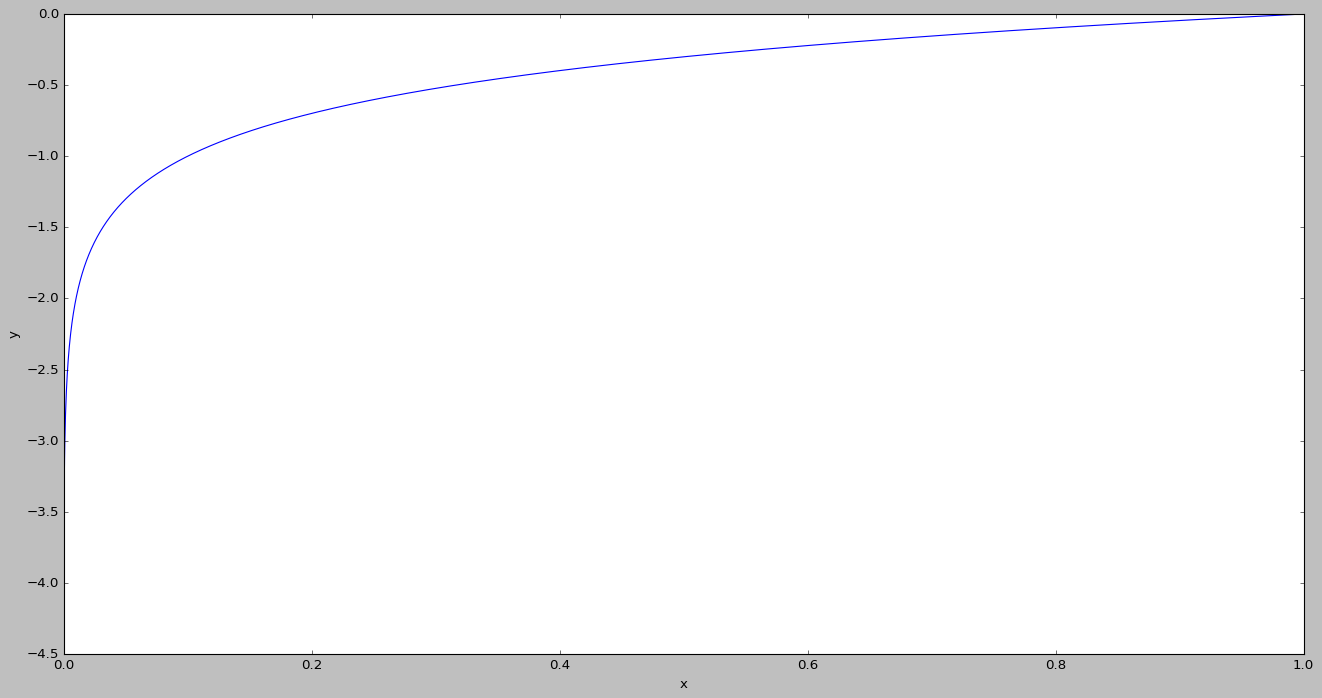

In [11]:
x=[np.random.random() for i in range(10000)]
y = [np.log10(i) for i in x]
prueba = pd.DataFrame()
prueba['x'] = x
prueba['y'] = y
sns.lineplot(data = prueba, x ='x', y='y')
;

In [12]:
plt.style.use('Solarize_Light2')
plt.rcParams['figure.figsize']=(20, 10)

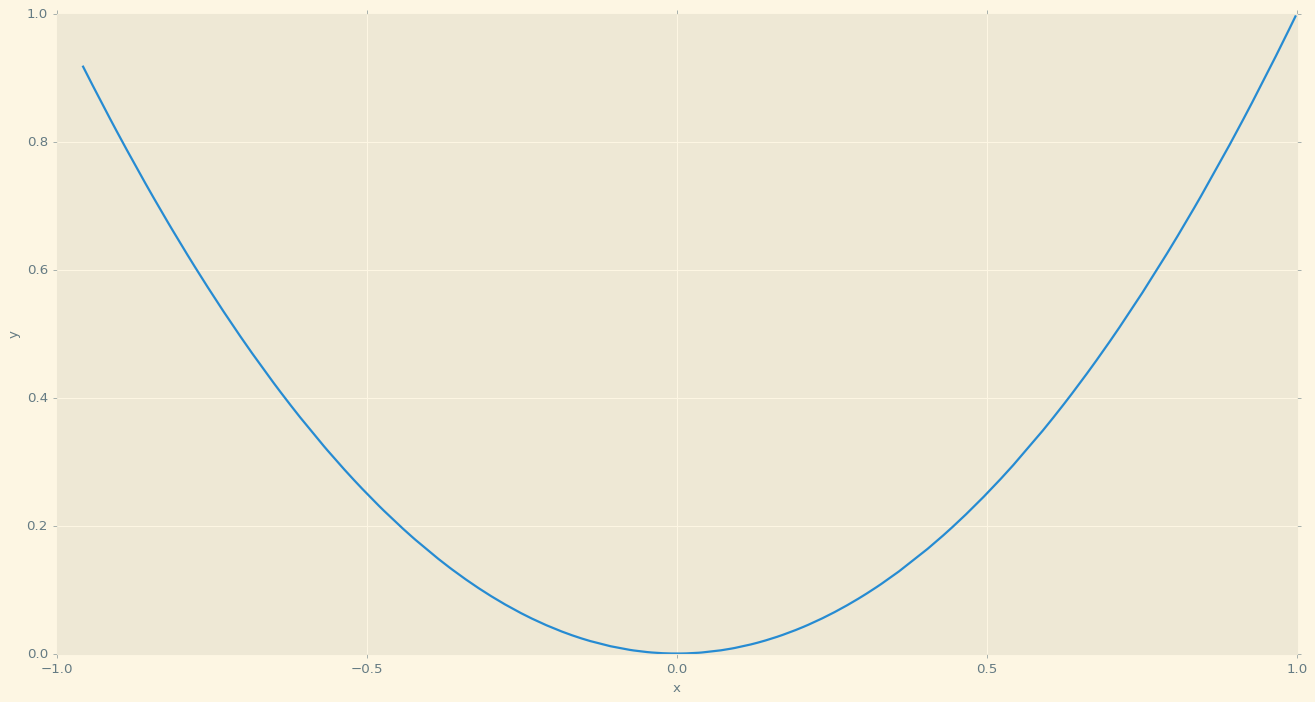

In [13]:
x= [-np.random.random() for i in range(100)] + [np.random.random() for i in range(100)]
y = [i**2 for i in x]
prueba = pd.DataFrame()
prueba['x'] = x
prueba['y'] = y
sns.lineplot(data = prueba, x ='x', y='y');

In [14]:
plt.style.use('default') # restablecer valor por defecto
plt.rcParams['figure.figsize']=(20, 10)

## Countplot

Usaremos el countplot cuando queramos obtener el número de observaciones de una columna categórica en forma de gráfico de barras, vamos a explicar algunos de los parámetros que podemos usar para poder darle el formato que queramos.
    
    - data: El set de datos que usaremos para realizar el gráfico --> type DataFrame
    - x, y, hue: Variables que queremos mostrar en el grafico --> str o list of strings
    - orient: 'v' (para mostrar barras verticales) | 'h' (para barras horizontales)
    - color: Para cambiar el color de las barras --> string
    - palette: Nombre de la paleta de colores que queremos usar en el caso de usar el parámetro 'hue' o que muestre cada una de las barras de un color diferente.
[color_palettes_seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html)

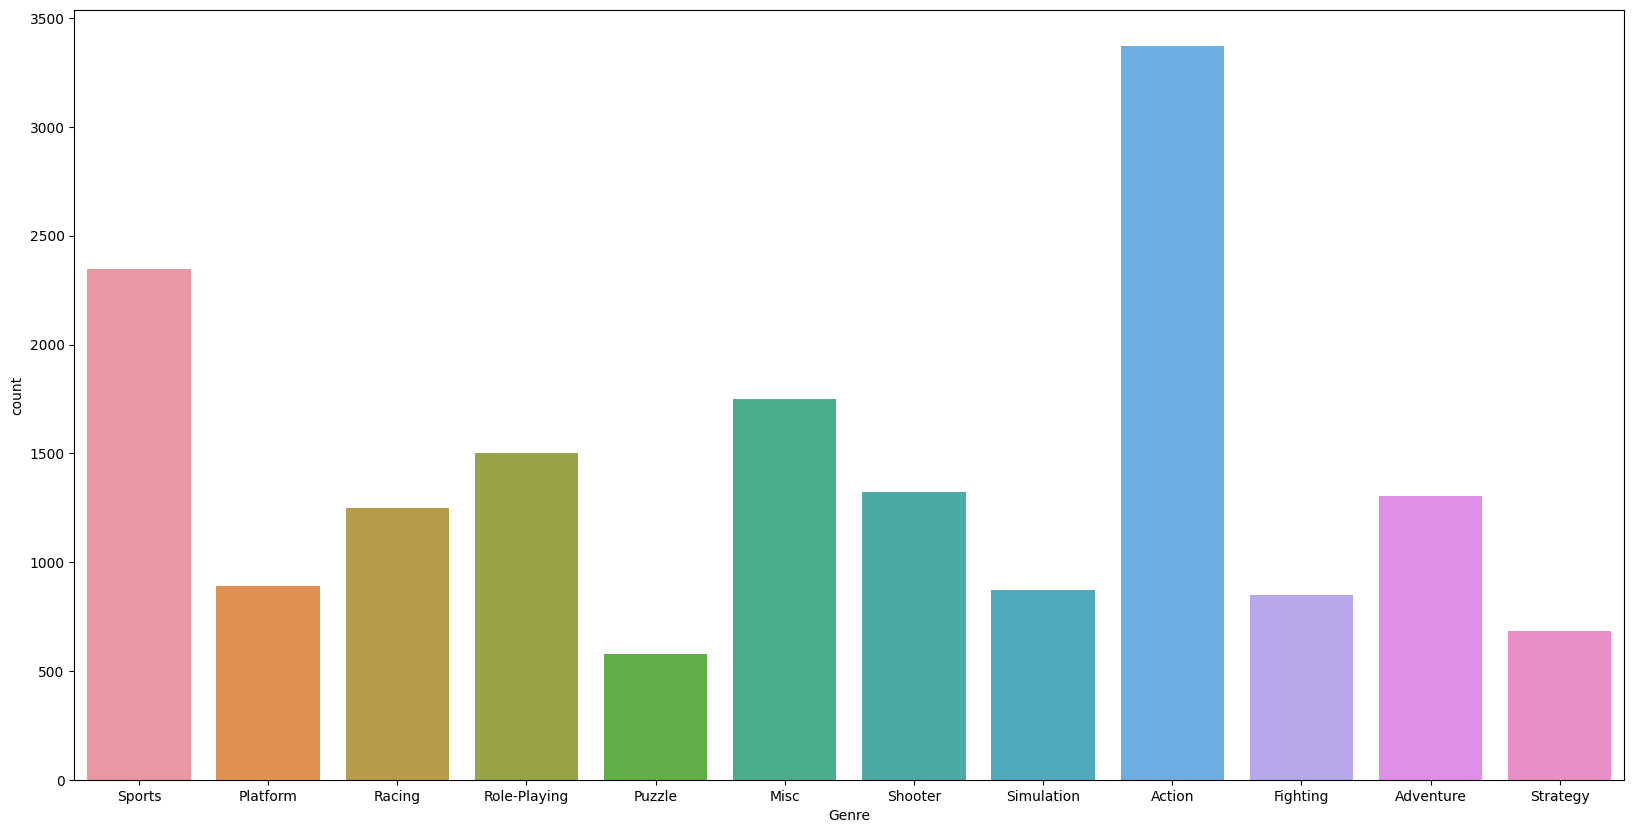

In [15]:
sns.countplot(data=df, x='Genre');

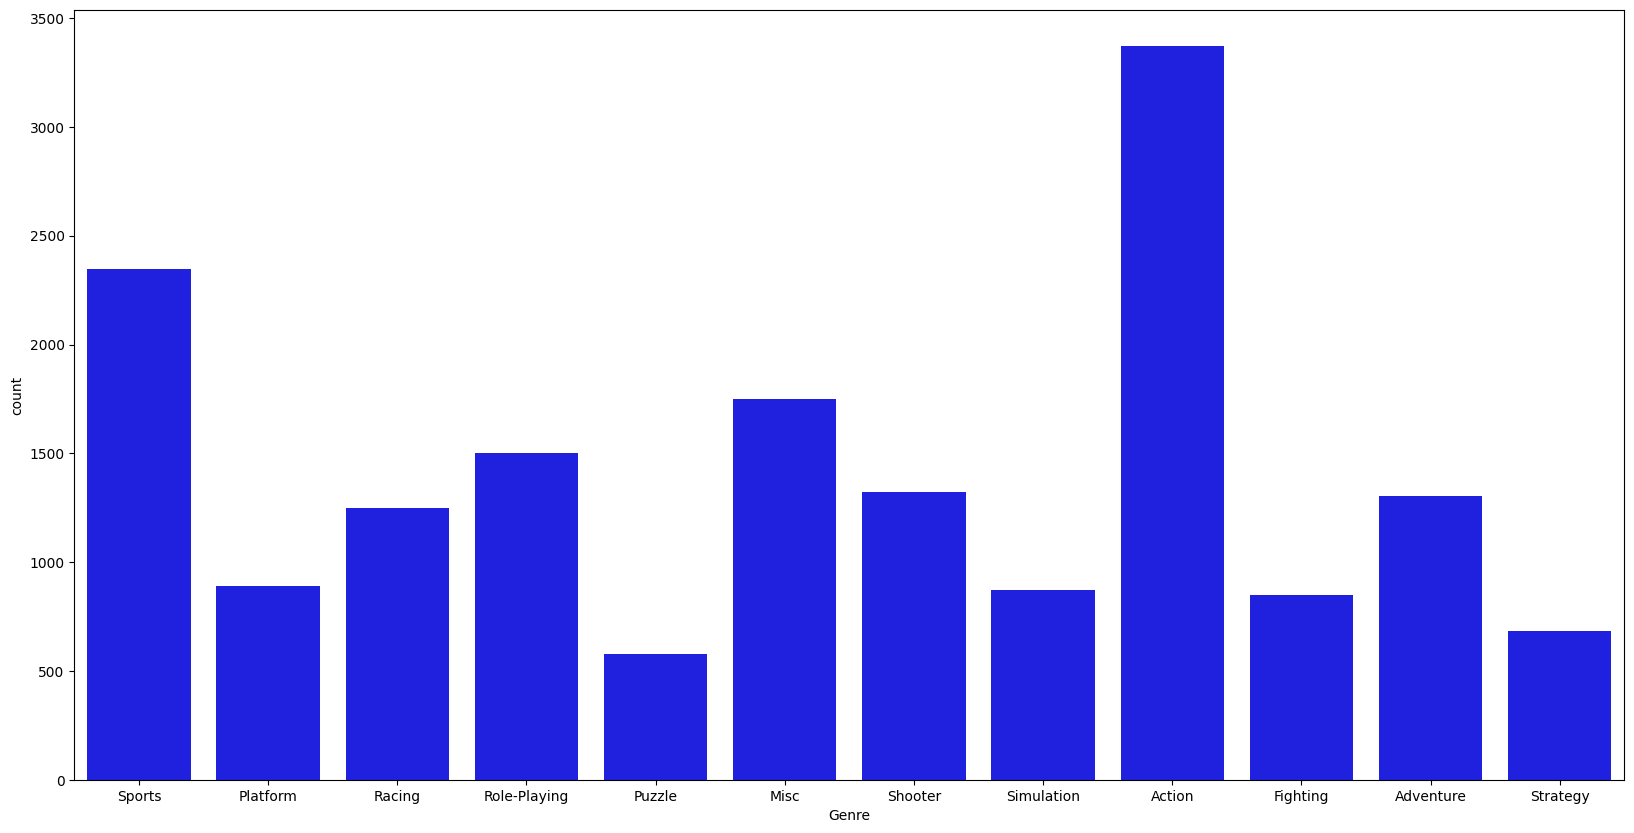

In [16]:
sns.countplot(data=df, x='Genre', color='blue');

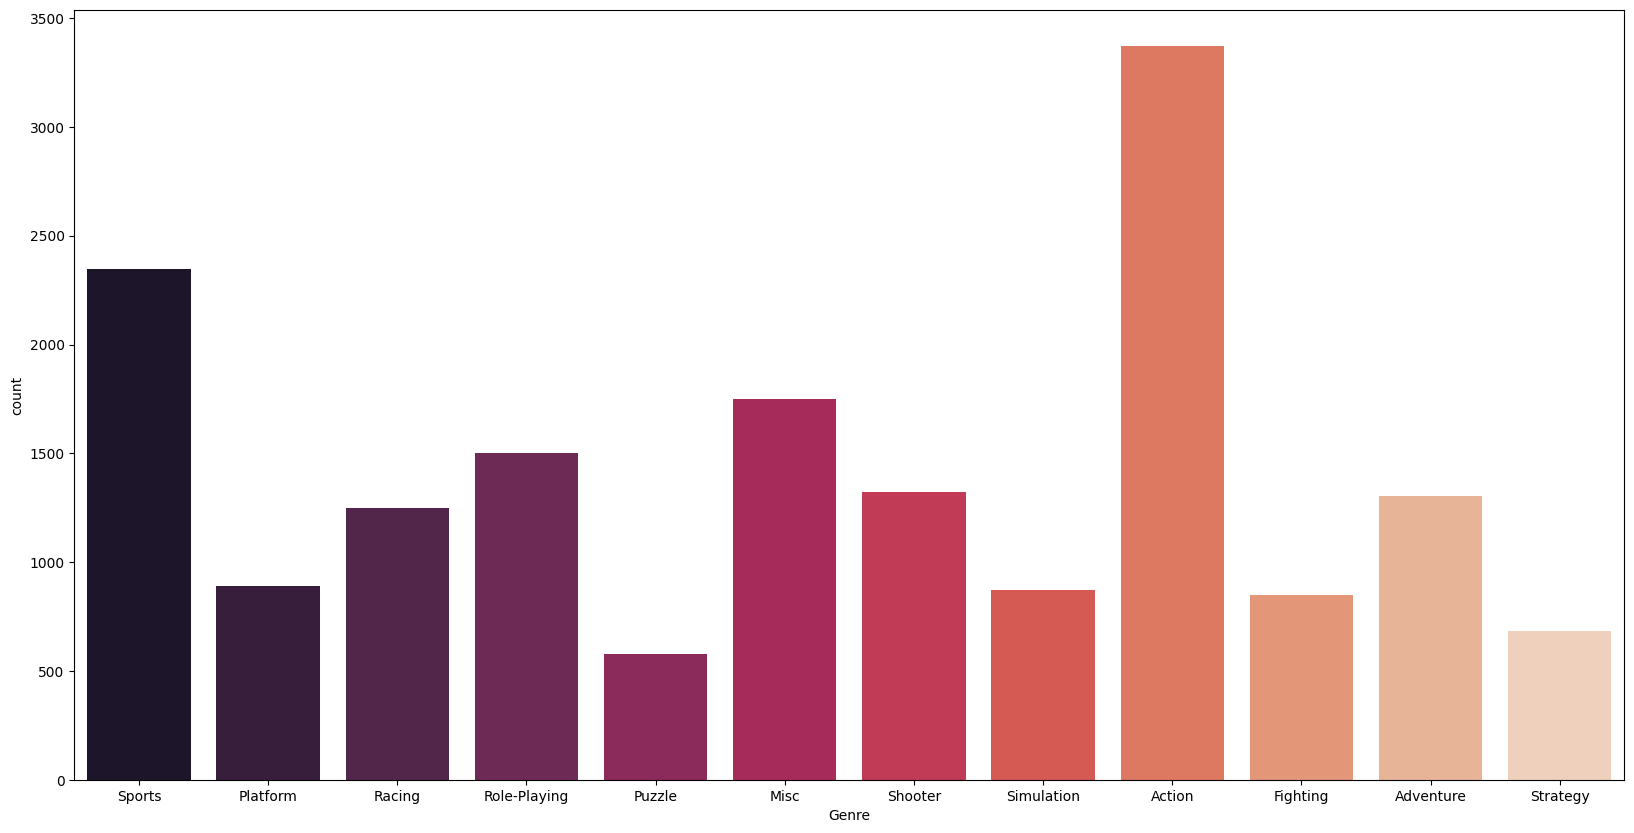

In [17]:
sns.countplot(data=df, x='Genre', palette='rocket');

In [18]:
def print_countplot(data:pd.DataFrame, x:str, palette:str=None, 
                    title:str=None, save:bool = False,ax:int=None,)->None:
    
    '''
        Función que devuelve un countplot de los datos que recibe
        
        Parameters:
        -----------
        df: Fuente de datos (pd.DataFrame)
        x: Columna de los datos sobre la que queremos realizar el countplot (str)
        palette: Paleta de colores que queremos usar para nuestro gráfico (str, None by default)
        title: Titulo que queremos ponerle al gráfico
        save: Si queremos guardar nuestro grafico o no
        ax: Posición en la que mostraremos nuestro gráfico en el caso de usar subplots
        
        Return:
        ------
        
        None, muestra el gráfico en el notebook pero no devuelve nada.
        
    '''
    
    p = sns.countplot(data=data, x=x, palette=palette)
    p.set_title(title, fontsize=20)
    
    if save:
        try:
            plt.savefig(f'graphics/{title}.png')
        except:
            destino = input('No exite la carpeta de destino, introduce un nombre para la carpeta de destino: ')
            os.mkdir(destino)
            plt.savefig(f'{destino}/{title}.png')
        
    plt.show();
    

No exite la carpeta de destino, introduce un nombre para la carpeta de destino:  graphics


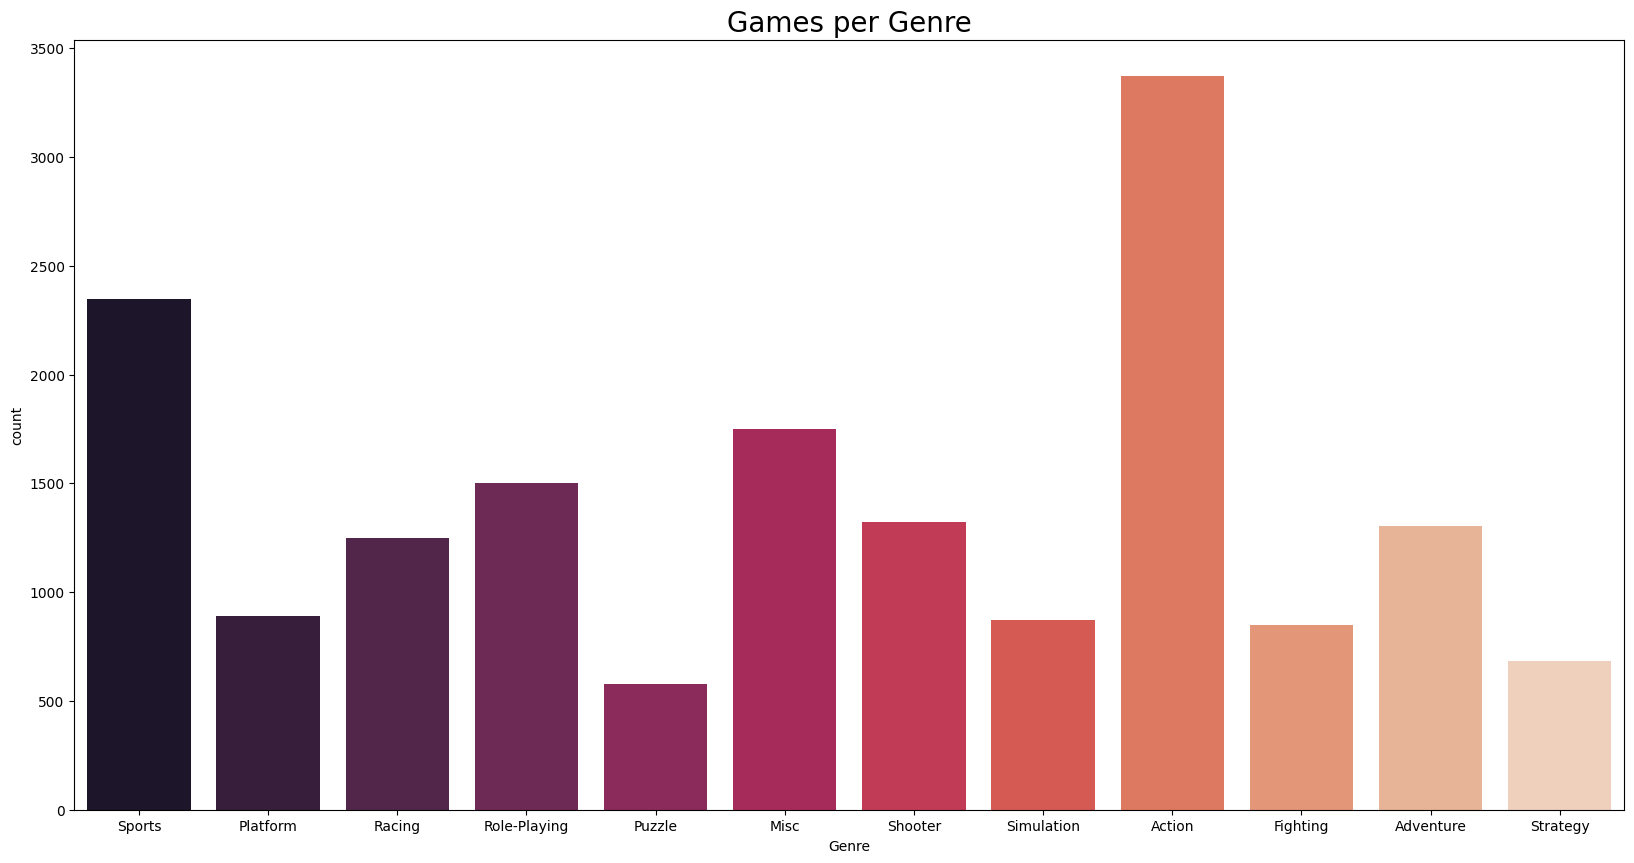

In [19]:
print_countplot(df, 'Genre', 'rocket', 'Games per Genre', save=True)

## Histograma

El histograma es una herramienta clásica en la visualización de datos en la que podemos ver la distribución de una o más variables realizando un conteo de cada una de las observaciones y agrupándolas en un número concreto de grupos. Algunos de los parámetros que podemos usar a la hora de mostrar un histograma.

    - data: Set de datos que usaremos para realizar el histograma - type pd.DataFrame
    - x,y: Columna o columnas sobre las que queremos realizar el gráfico - type string o list of strings
    - hue: Parámetro por el que queremos mapear nuestro datos
    - stat: Agregado estadístico que queremos aplicar al gráfico
    - bins: Número de barras que tendrá nuestro gráfico sobre el que agruparemos los resultados del stat
    - bindwidth: Número que nos indica el paso en el que dividimos el rango total de la variable. 
      Ej. Si nuestro rango de datos es entre 0 y 10 y le damos un valor de 2, nos dividiría el eje x en [0,2,4,6,8,10]
    - cumulative: Si el valor es True nos muestra los datos de forma acumulada
    - kde: Si es True muestra estimación de densidad de los datos
    

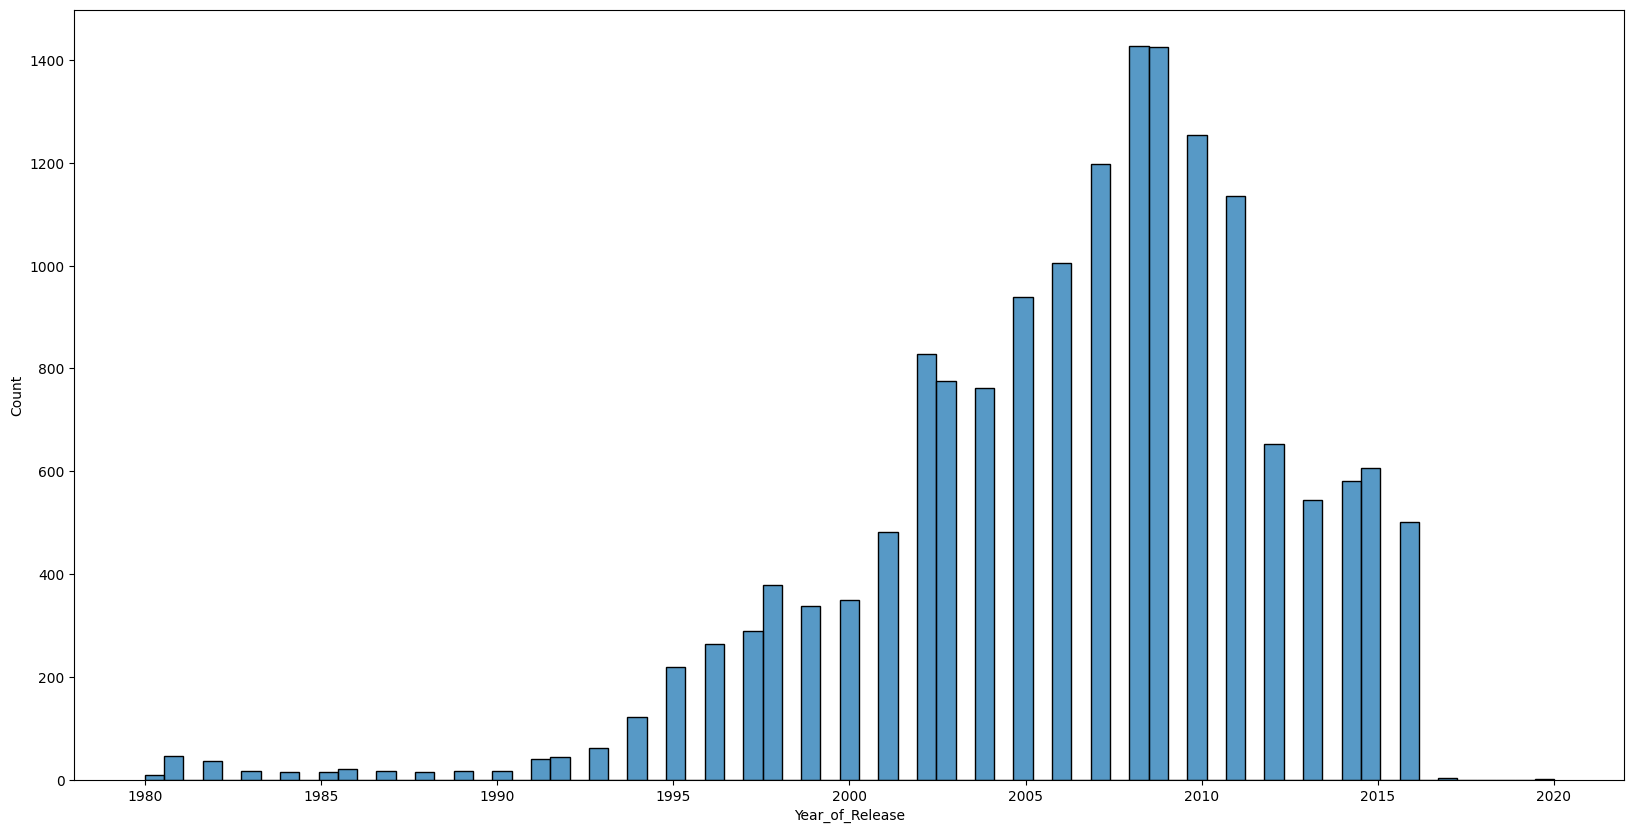

In [20]:
sns.histplot(data=df, x='Year_of_Release');

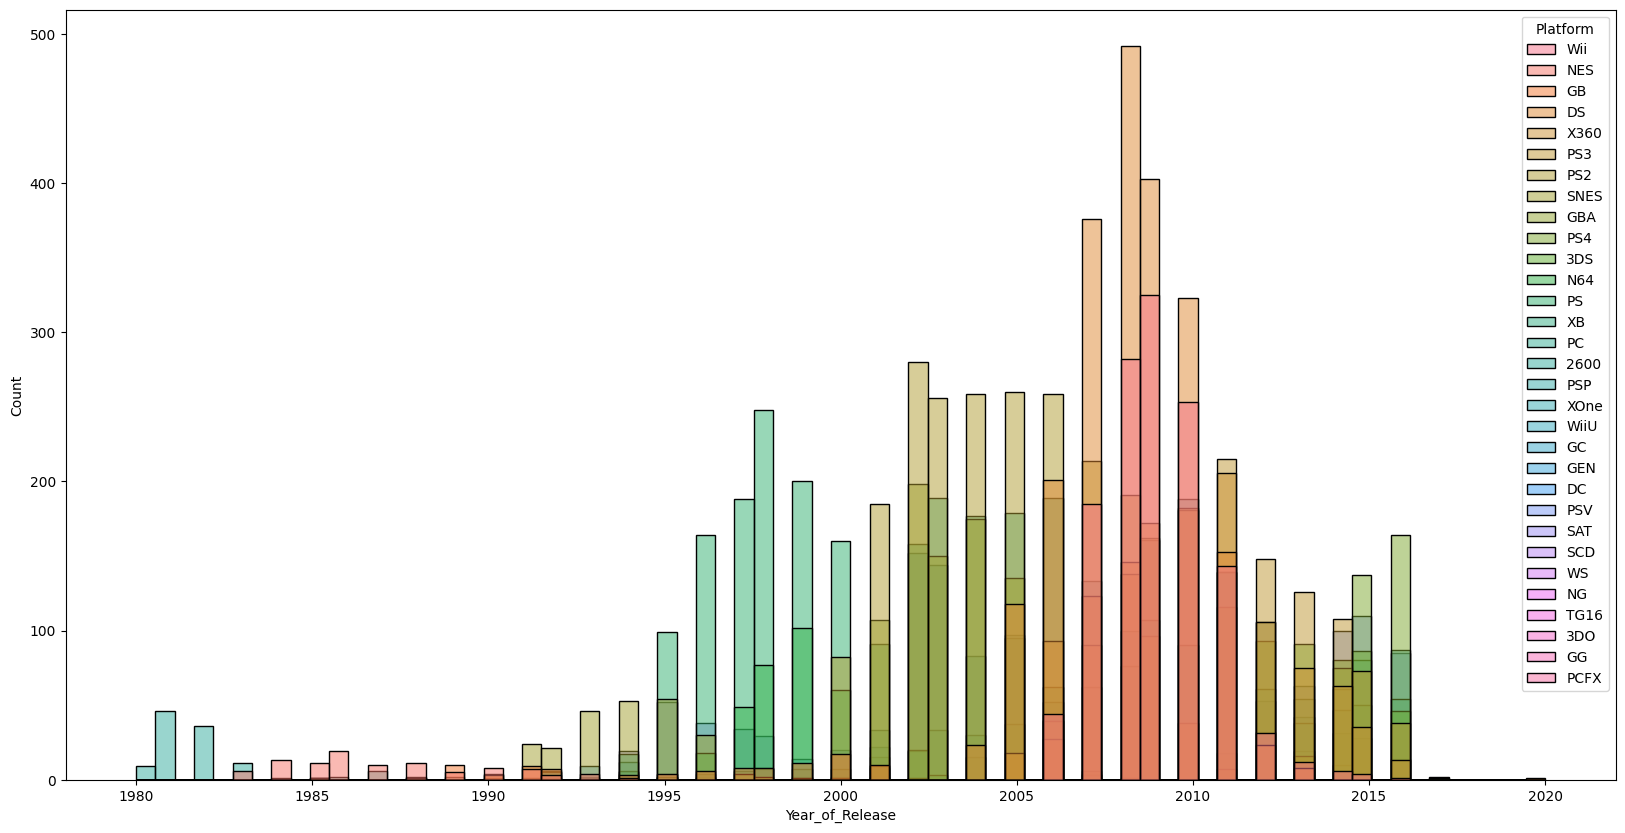

In [21]:
sns.histplot(data=df, x='Year_of_Release', hue='Platform');

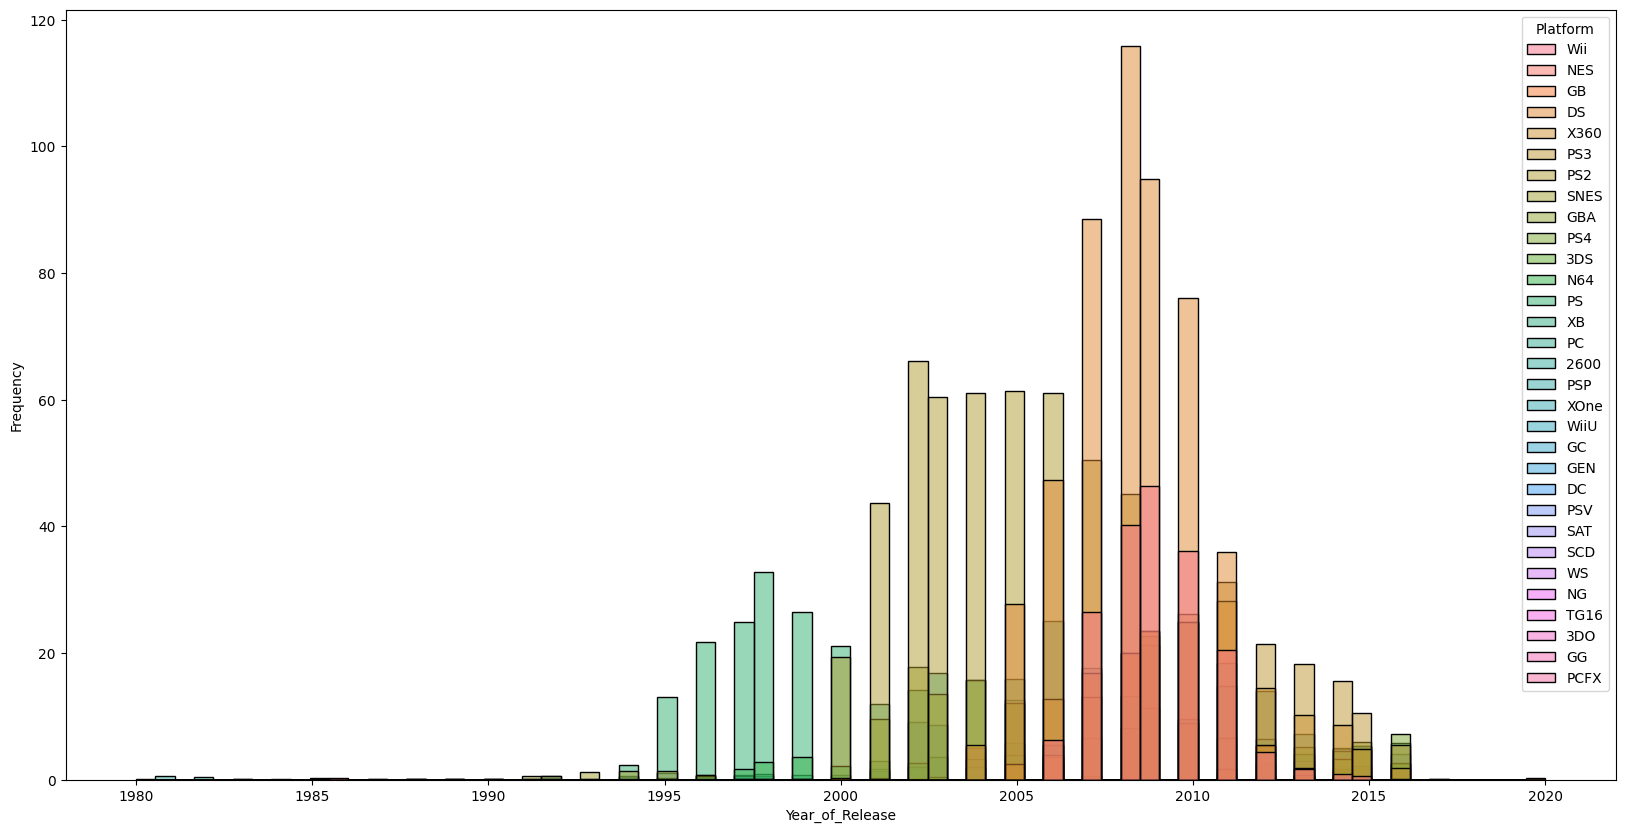

In [22]:
sns.histplot(data=df, x='Year_of_Release', hue='Platform', stat='frequency');

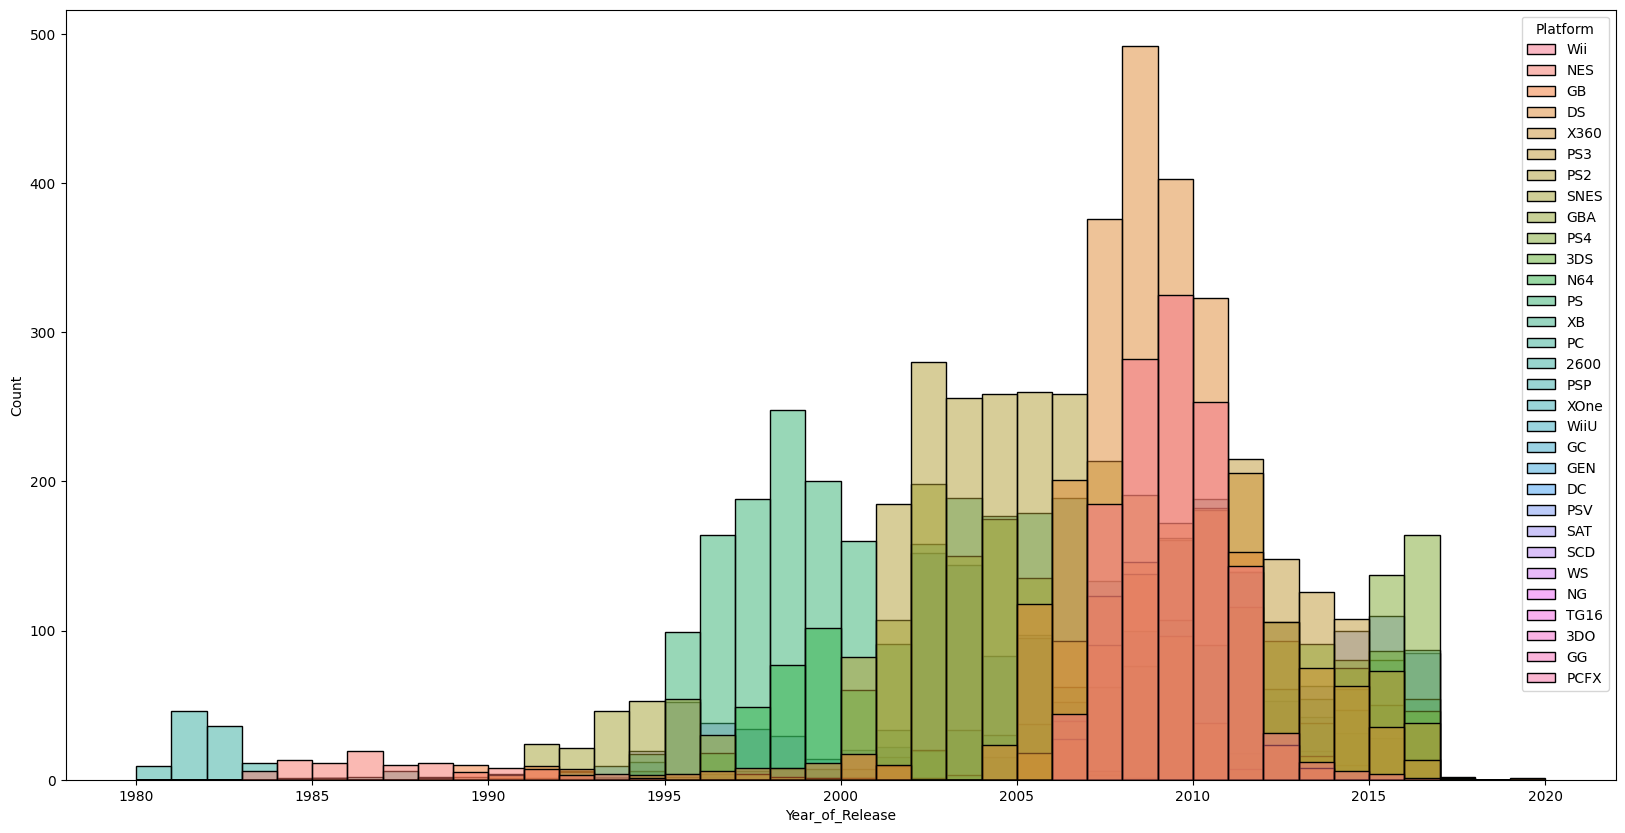

In [23]:
sns.histplot(data=df, x='Year_of_Release', hue='Platform', stat='count', bins=40);

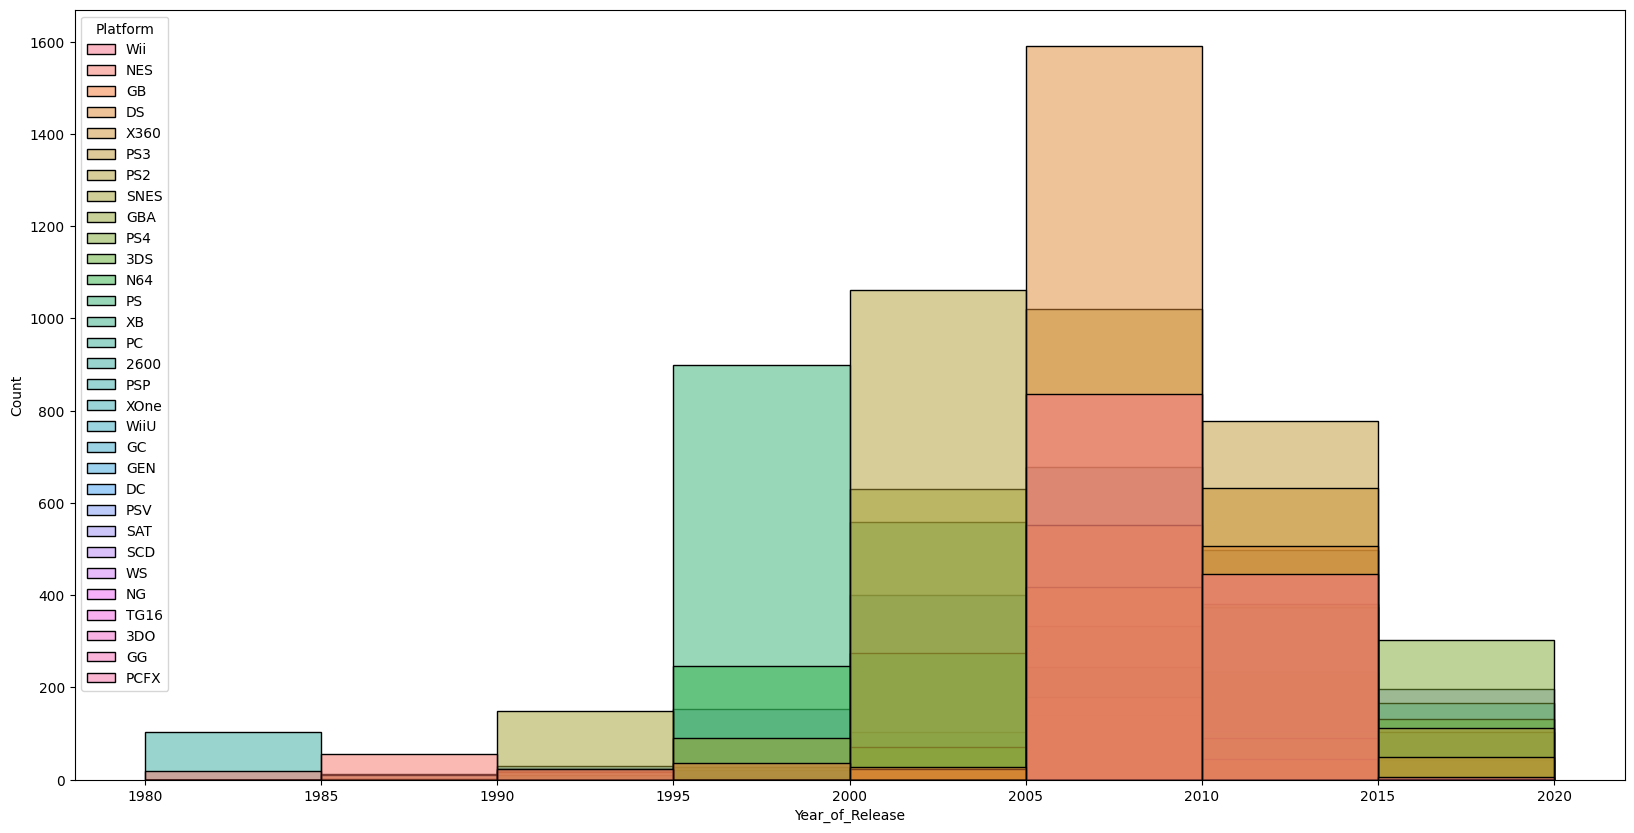

In [24]:
sns.histplot(data=df, x='Year_of_Release', hue='Platform', stat='count', binwidth=5);

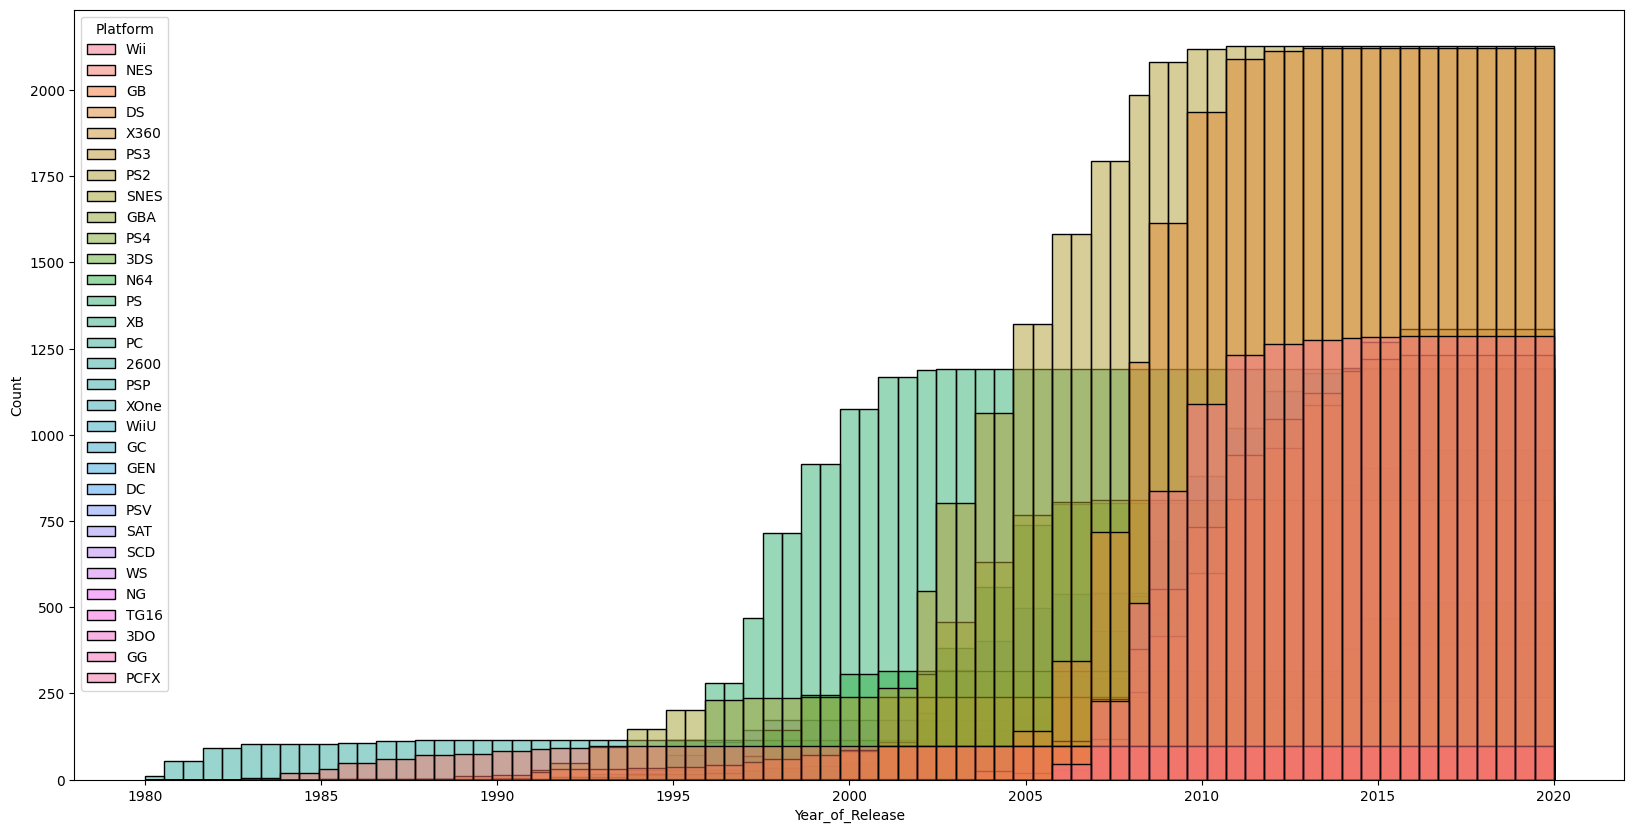

In [25]:
sns.histplot(data=df, x='Year_of_Release', hue='Platform', stat='count', cumulative=True);

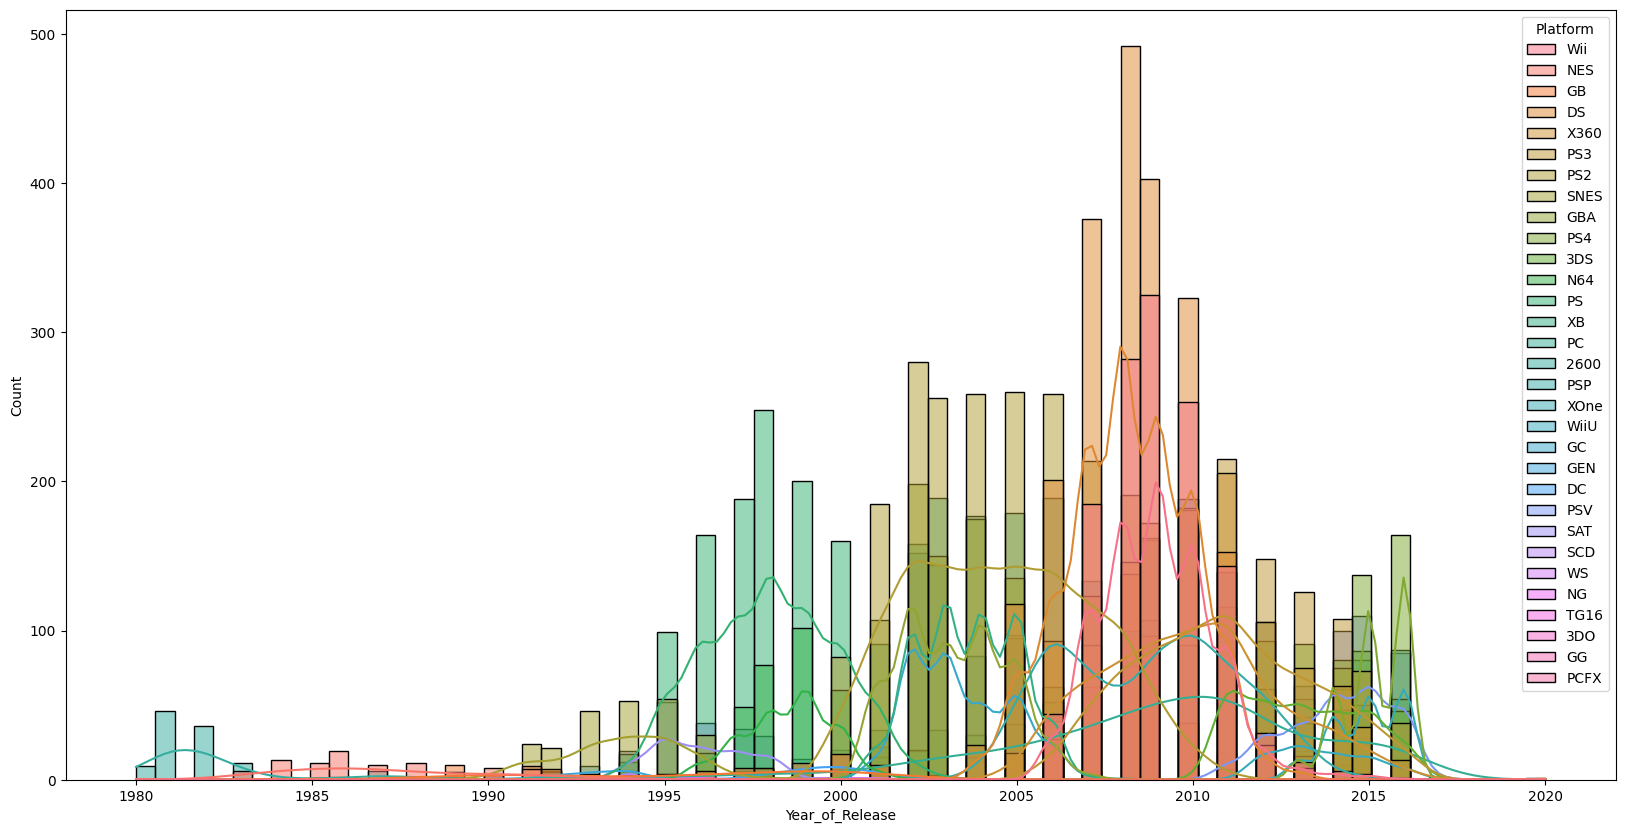

In [26]:
sns.histplot(data=df, x='Year_of_Release', hue='Platform', stat='count', kde=True);

In [27]:
def print_histplot(data:pd.DataFrame, x:str, title:str=None, hue:str=None, palette:str= None, stat:str='count', ax:int=None,
                   bins:int=10,binwidth:int=None, cumulative:bool=False, kde:bool=False, save:bool=False)->None:
    
    '''
        Función que no imprime un histograma
        
        Parameters:
        ----------
        df: Set de datos
        x: Columna o variables sobre las que deseamos realizar el gráfico
        title: Título de nuestro gráfico
        hue: Variable sobre la que deseamos mapear
        palette: Paleta de colores que deseamos usar en nuestro gráfico
        stat: Agregado estadístico sobre el que queremos realizar nuestro histograma
        bins: Número de columnas por las que queremos que agrupe nuestros datos
        binwidth: Paso en el que dividimos nuestro rango de datos
        cumulative: Si queremos realizar un histograma acumulativo o no
        kde: Parametro para mostrar en el gráfico la línea de densidad
        save: Si queremos guardar nuestro gráfico
        ax: Posición en la que mostraremos nuestro gráfico en el caso de usar subplots
        
        Return:
        -------
        
        None, muestra el gráfico por pantalla pero la función no devuelve nada
    '''
    
    p=sns.histplot(data=data, x=x, hue=hue, stat=stat,\
                 palette=palette, bins= bins, binwidth= binwidth,\
                 cumulative=cumulative, kde=kde)
    p.set_title(title, fontsize=20)
    
    if save:
        try:
            plt.savefig(f'graphics/{title}.png')
        except:
            destino = input('No exite la carpeta de destino, introduce un nombre para la carpeta de destino: ')
            os.mkdir(destino)
            plt.savefig(f'{destino}/{title}.png')
        
    plt.show();

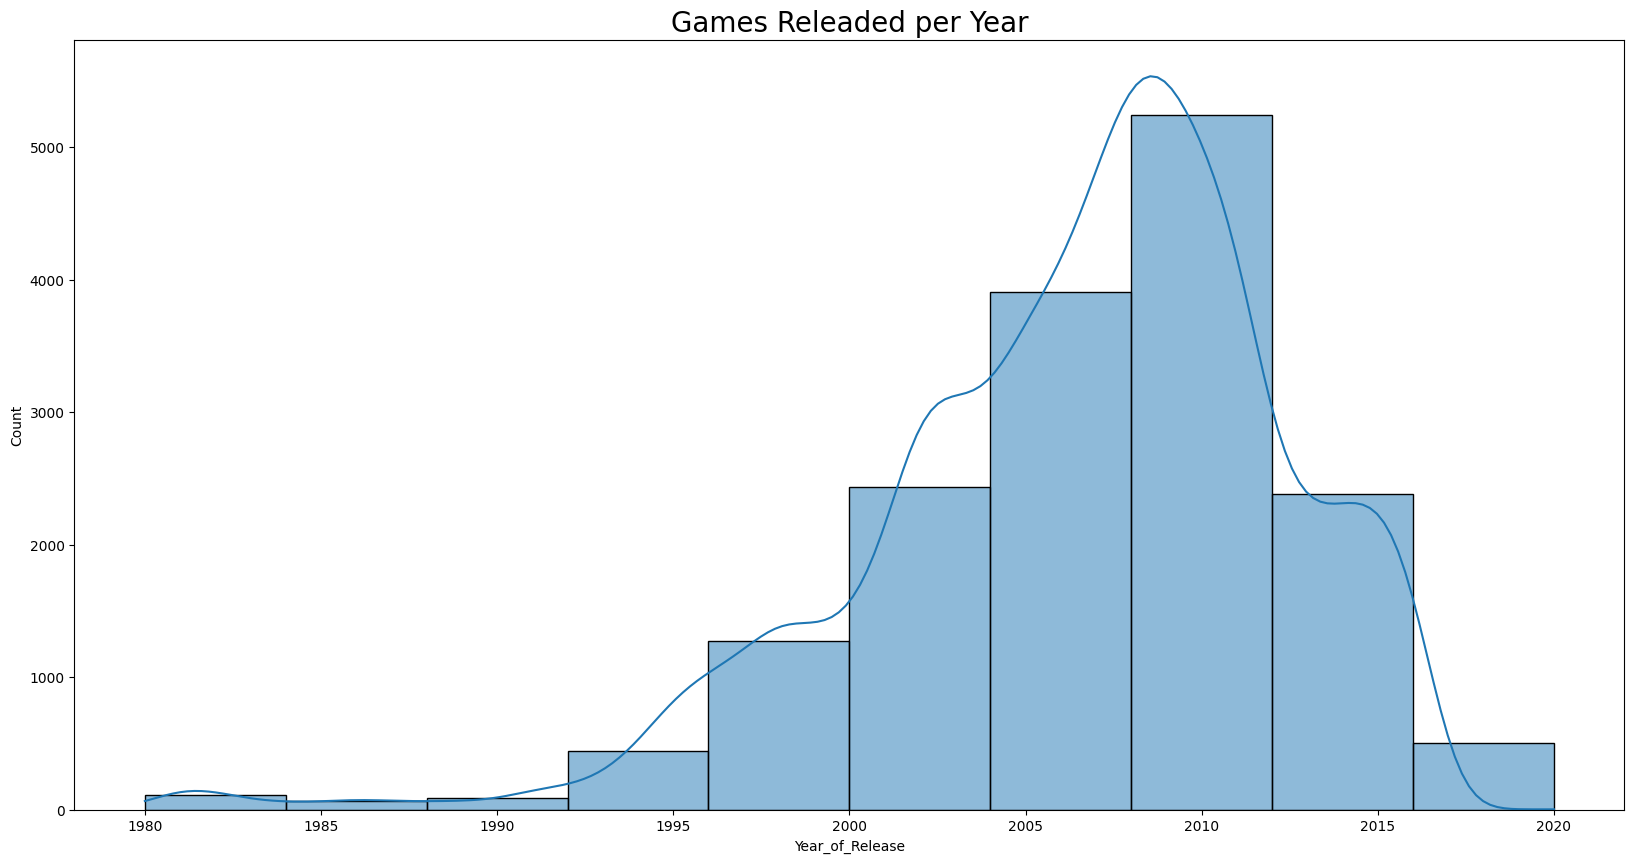

In [28]:
print_histplot(df,x='Year_of_Release', kde=True, title='Games Releaded per Year')

## Scatterplot

El scatterplot es un gráfico de puntos en el que representamos el valor de una variable frente a otra, solemos usar este tipo de gráficos para comprobar la dispersión de nuestros datos. Solemos usar los siguientes parámetros:

    - data: Datos sobre los que vamos a realizar el gráfico
    - x,y: Variables que vamos a comparar
    - hue: Agrupación que queremos mostrar en nuestro gráfico
    - size: Parámetro que sirve para diferenciar diferentes grupos y los muestra en diferentes tamaños
    - style: Sirve para añadir otra dimensión más a nuestro gráfico, agrupa por la columna que recibe y los muestra con un estilo diferente
    - palette: Paleta de colores que queremos usar


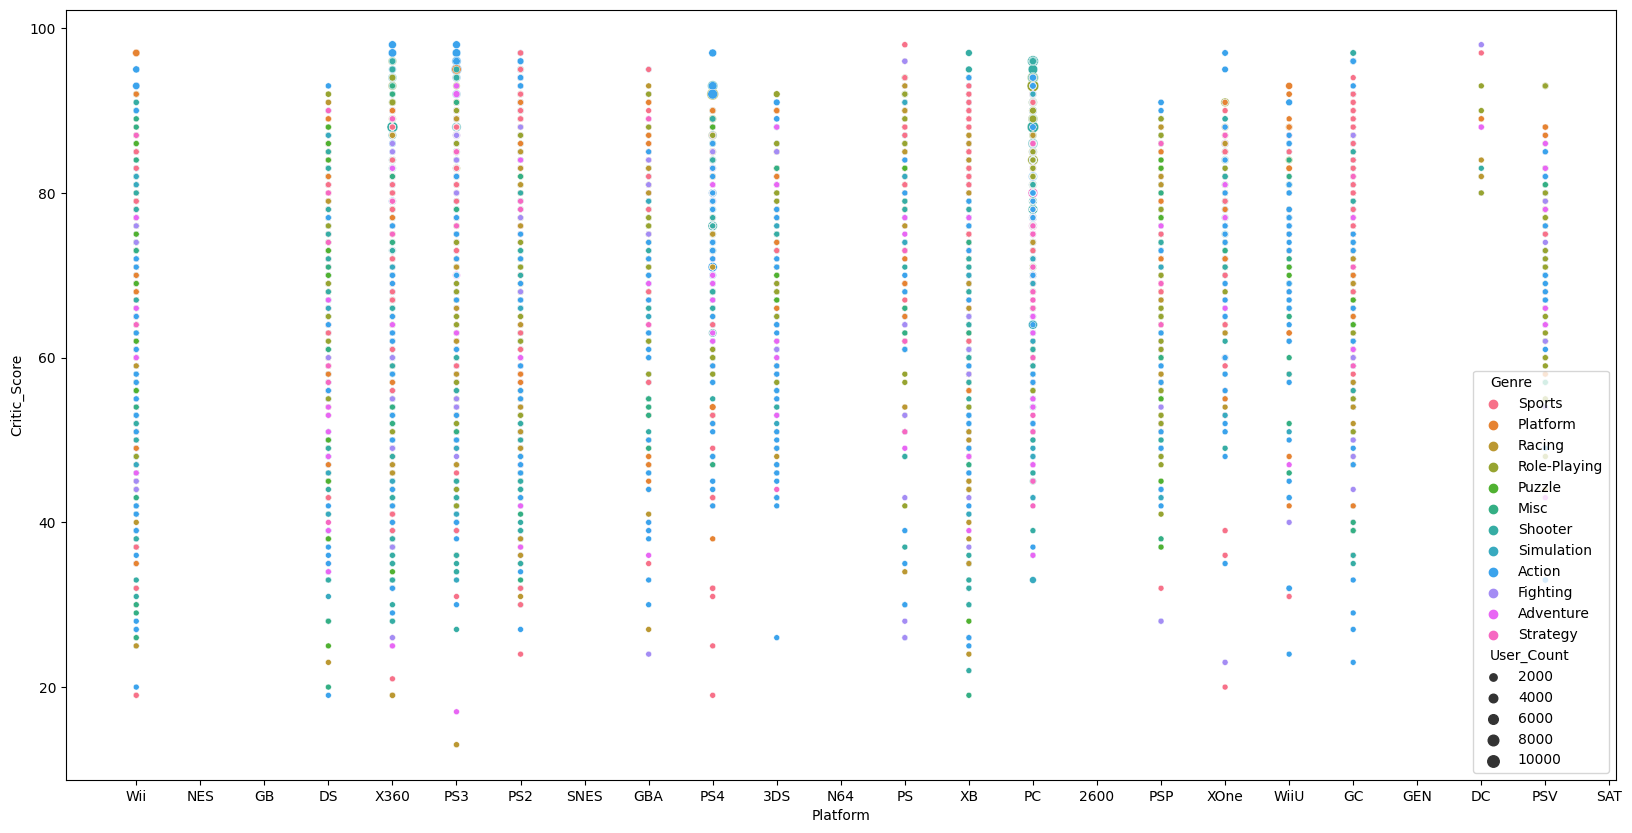

In [29]:
sns.scatterplot(data=df, x='Platform', y='Critic_Score', hue='Genre', size='User_Count');

In [30]:
def print_scatter(data:pd.DataFrame, x:str, y:str, title:str=None, hue:str=None, ax:int=None,
                  size:str=None, style:str=None, palette:str=None, save:bool=False)->None:
    '''
        Función que nos muestra por pantalla un gráfico de dispersión de dos variables.
        
        Parameters:
        -----------
        df: Datos sobre los que queremos realizar el gráfico
        x: Variable del eje X
        y: Variable del eje Y
        title: Título de nuestro gráfico
        hue: Agrupación que nos muestra los diferentes grupos de nuestros datos en forma de colores diferentes
        size: Agrupación que nos muestra los diferentes grupos de nuestros datos en forma de diferentes tamaños
        style: Agrupación que nos muestra los diferentes grupos de nuestros datos en forma de estilos de puntos diferentes
        palette: Paleta de colores que queremos usar en el hue
        save: Parametro para guardar nuestro gráfico, False por defecto
        ax: Posición en la que mostraremos nuestro gráfico en el caso de usar subplots
    '''
    
    p=sns.scatterplot(data=data, x=x, y=y, hue=hue, size=size,\
                 palette=palette, style=style)
    if title:
        p.set_title(title, fontsize=20)
    else:
        title = f'{x} vs {y}'
        p.set_title(title, fontsize=20)
    
    if save:
        try:
            plt.savefig(f'graphics/{title}.png')
        except:
            destino = input('No exite la carpeta de destino, introduce un nombre para la carpeta de destino: ')
            os.mkdir(destino)
            plt.savefig(f'{destino}/{title}.png')
        
    plt.show();
    

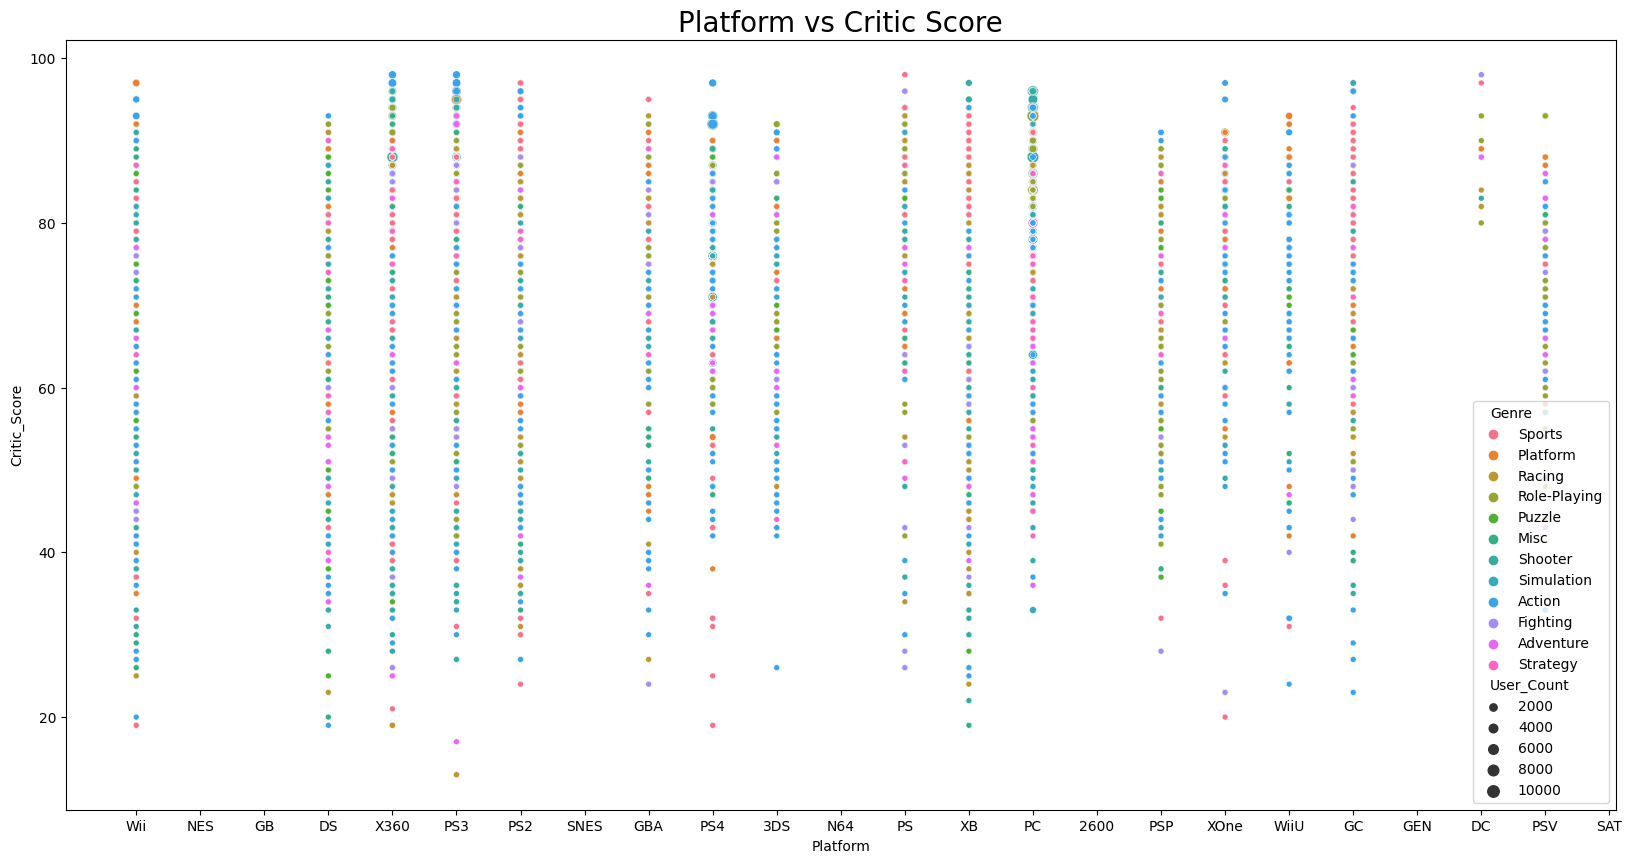

In [31]:
print_scatter(data=df, x='Platform', y='Critic_Score',title='Platform vs Critic Score', hue='Genre', size='User_Count')

## Barplot

Los gráficos de barras representan una estimación de la tendencia central respecto a una altura determinada de un rectángulo de una variable numérica, también nos muestra un indicador del error estandar de dicha variable mediante una barra central en cada una de las columnas. Paramétros más usados:

    - data: Set de datos sobre los que queremos realizar el gráfico
    - x,y: Variables a representar en el gráfico
    - hue: Variable (normalmente categórica) que podemos utilizar para agrupar datos y mapearlos
    - orient: 'v' | 'h', disposición de las barras vertical u horizontal.
    - palette: Disposición de colores
    - color: Si queremos que todas las barras sean del mismo color

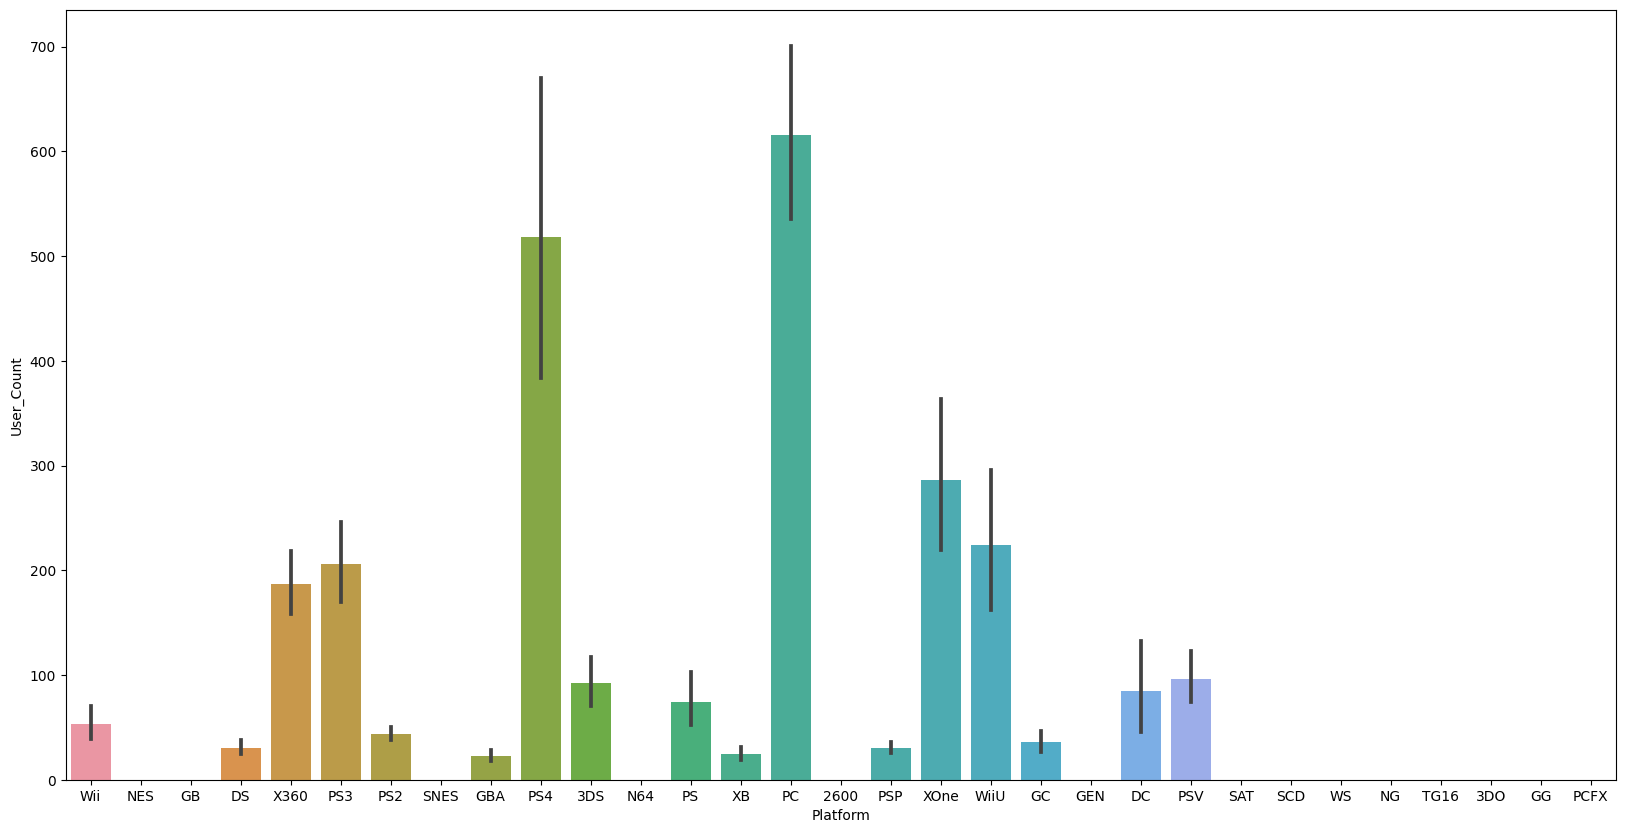

In [32]:
sns.barplot(data=df, x='Platform', y='User_Count');

In [33]:
def print_barplot(data:pd.DataFrame, x:str, y:str, hue:str=None, orient:str='v', palette:str=None, 
                  color:str=None, title:str=None, save:bool=False, ax:int=None)->None:
    '''
        Función que muestra por pantalla un gráfico de barras de los datos que recibe como parámetro.
        
        Parameters:
        -----------
        data = Set de datos a utilizar. pd.DataFrame
        x = Columna sobre la que queremos realizar la estimación
        y = Columna que usaremos para calcular la estimaión de x
        hue = Columna, normalmente categórica, que podemos usar para agrupar los datos X
        error = Parámetro para mostrar el error estandar de la columna
        orient = Disposición de las barras del gráfico 'v' o 'h'
        palette = Paleta de colores que queremos usar para representar nuestro gráfico
        color = Parámetro que usaremos en el caso de querer todas las columnas del mismo color
        title = Título que llevará nuestro gráfico en el caso de queramos que lo lleve
        save = Parámetro para guardar nuestro gráfico en el disco duro
        ax: Posición en la que mostraremos nuestro gráfico en el caso de usar subplots
    '''
    
    p=sns.barplot(data=data, x=x, y=y, hue=hue,\
                 orient=orient, palette=palette, color=color)
    p.set_title(title, fontsize=20)
    
    if save:
        try:
            plt.savefig(f'graphics/{title}.png')
        except:
            destino = input('No exite la carpeta de destino, introduce un nombre para la carpeta de destino: ')
            os.mkdir(destino)
            plt.savefig(f'{destino}/{title}.png')
        
    plt.show();

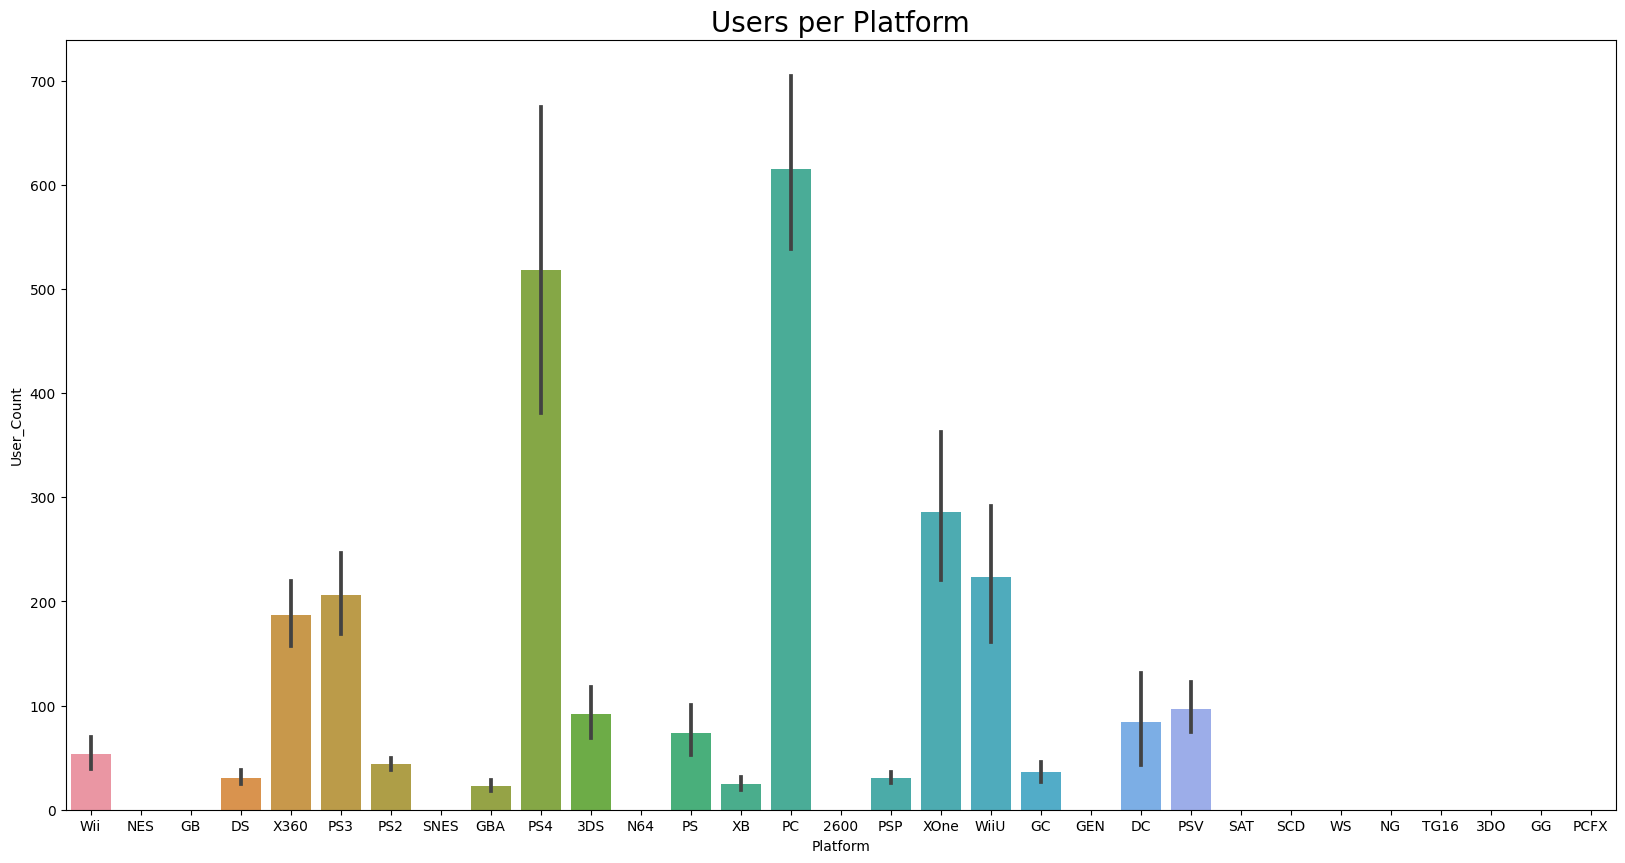

In [34]:
print_barplot(data=df, x='Platform', y='User_Count', title='Users per Platform');

## Boxplot & Violinplot

Los boxplot o gráficos de "cajas y bigotes" se usan para mostrar la distribución de los datos de una variable, así como para facilitar la comparación entre distintas variables a través de una variable categórica. La caja representa los quartiles del set de datos y los bigotes marcan los rangos a partir de los cauales marcaremos nuestros datos como 'outliers' (valores atípicos) a través del [test de tukey](https://en.wikipedia.org/wiki/Tukey%27s_range_test) o la función del rango intercuartílico.

El violinplot muestra la distribución de los datos a través de la estimación de la densidad (kde).

Parámetros más usados:

    - data: Set de datos que usaremos para realizar el gráfico
    - x,y, hue: variables que usaremos para las cajas
    - orient: orientación del gráfico 'v' | 'h'
    - palette : Paleta de colores que usaremos en nuestro gráfico
    - color : Si queremos que todas las cajas sean iguales utilizaremos este parámetro

Vamos a cargar unos datos nuevos, seaborn tiene una serie de dataset en su API que podemos usar e importar a través del método load_set(), en este caso usaremos el dataset 'titanic' que incluye unos datos extraidos de la tragedia del titanic, si queremos ver otros tipos de dataset tenemos el método get_dataset_names()

In [35]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [36]:
df = sns.load_dataset('titanic')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


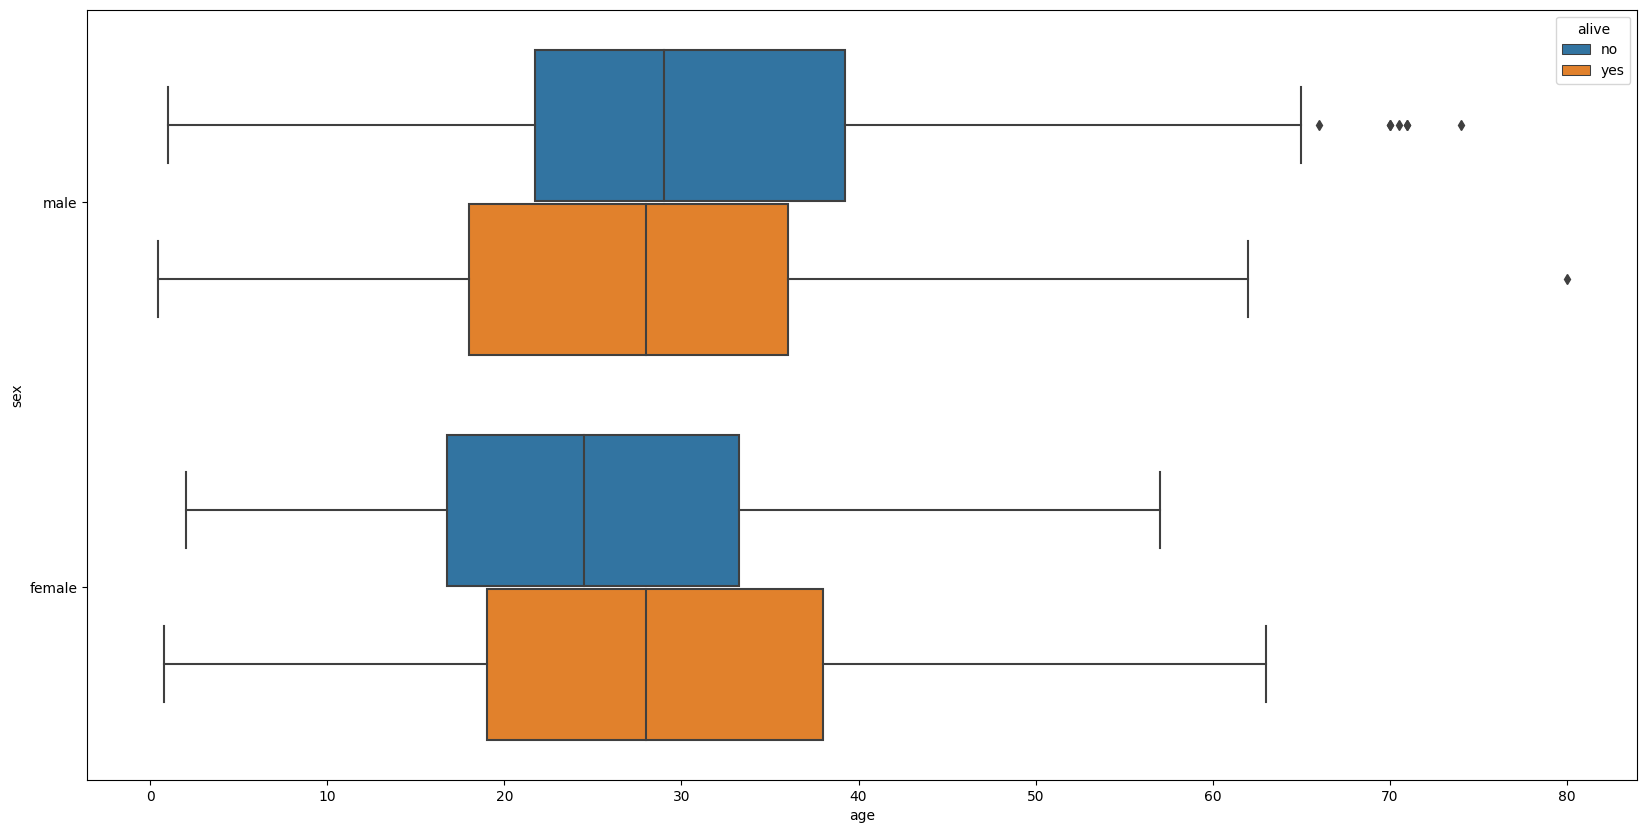

In [37]:
sns.boxplot(data=df, x='age', y='sex',hue='alive',orient='h');

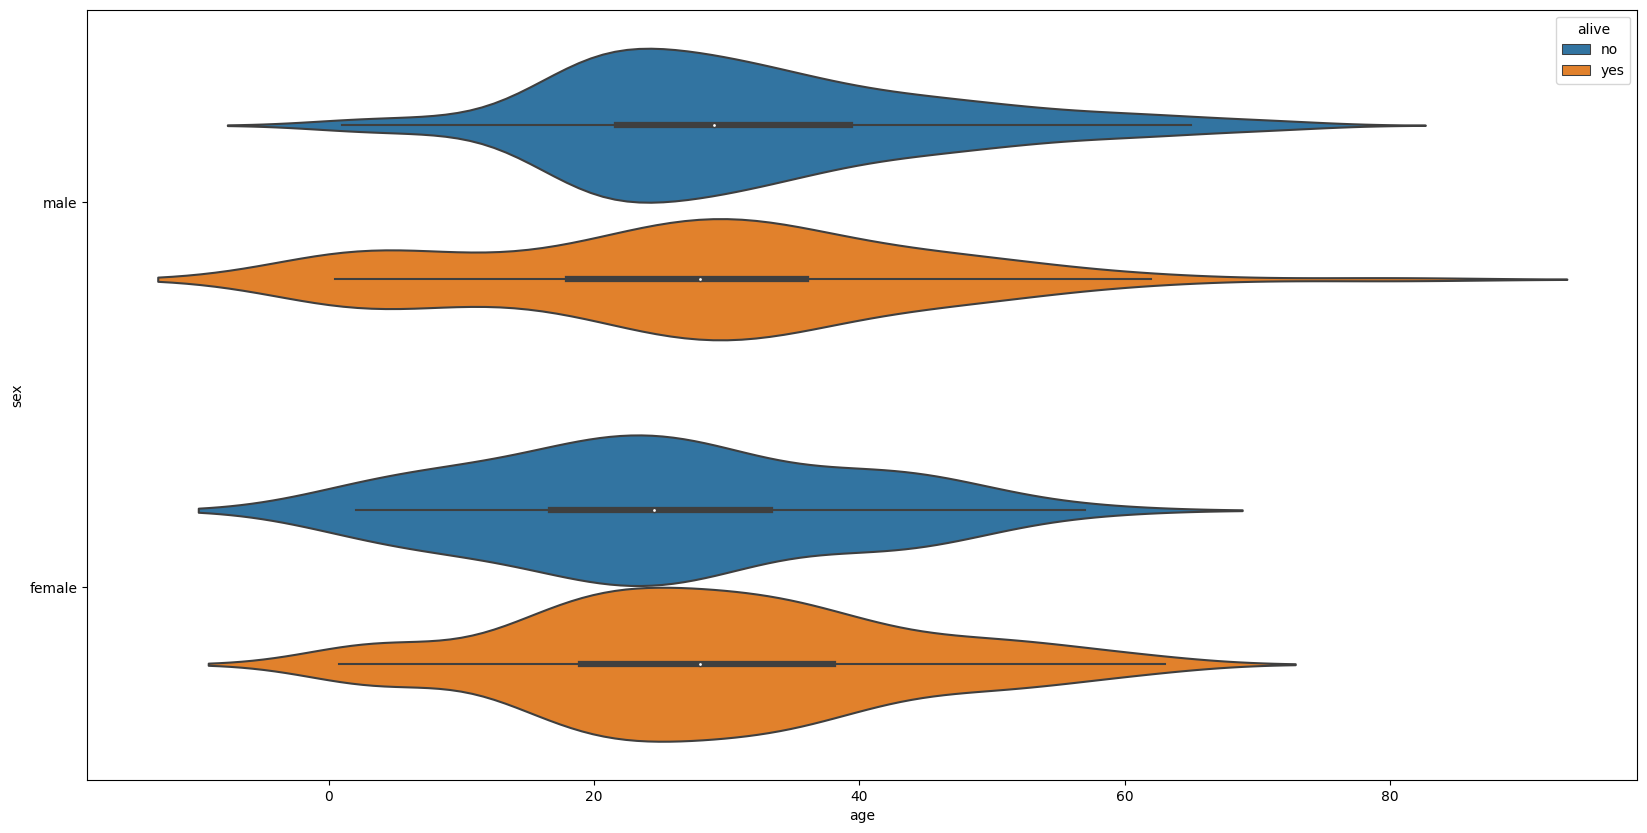

In [38]:
sns.violinplot(data=df, x='age', y='sex',hue='alive',orient='h');

## Heatmap

Los mapas de calor nos muestran los datos de una matriz codificados en forma de color, tienen varios usos pero para nuestro caso los usaremos principalmente para mostrar la matrice de correlación y la matriz de confusión (para evaluar modelos de clasficación de ML)

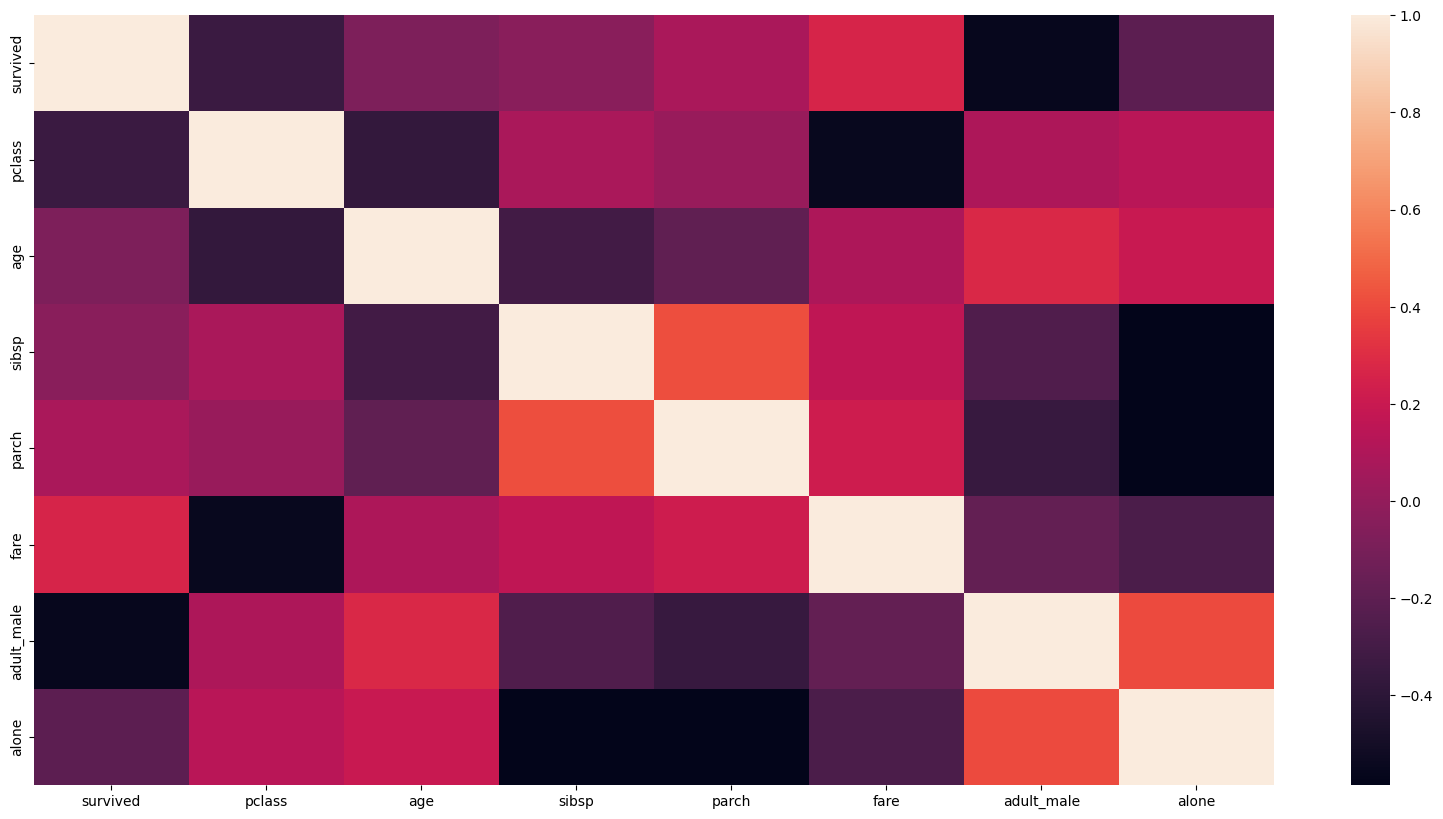

In [40]:
sns.heatmap(df.corr());

In [40]:
def print_heatmap_corr(data:pd.DataFrame, annot:bool=True, cmap:str=None, 
                       mask:bool=True, save:bool=False, title:str=None)->None:
    
    '''
        Función que recibe un dataframe y devuelve la matriz de correlación en forma de mapa de color
        
        Parameters:
        -----------
        
        data: Dataset sobre el que queremos realizar la matriz de correlación
        annot: Si queremos mostrar el valor de la correlación en la matriz, default = True
        cmap: Paleta de colores que queremos usar para nuestro heatmap
        mask: Parámetro para mostrar solo la triangular inferior de la matriz de correlación
        save: Parámetro para salvar nuestro gráfico
        title: Título que queremos que lleve nuestro gráfico
    '''
    
    sns.set(style='white')     # estilo blanco hace que el fondo de la matriz sea transparente

    if mask: # Si mask es True
        mascara=np.triu(np.ones_like(data.corr(), dtype=bool))   # genera una mascara para tapar valores
    else:
        mascara = None # No aplicamos máscar

    if cmap: # Si le hemos pasado una paleta de colores
        c_map = sns.color_palette(cmap, as_cmap=True)
    else:
        c_map=sns.diverging_palette(0, 10, as_cmap=True)   # paleta de colores por defecto


    p = sns.heatmap(data.corr(), # aplica el método corr() a nuestro dataset
            mask=mascara, # aplica la mascara
            cmap=c_map, # aplica la paleta de colores
            vmax=1, # para establecer el valor máximo de valores
            center=0, # establece el centro de la paleta de colores
            square=True,
            linewidth=0.5, # para aplicar borde a los cuadros de la matriz
            cbar_kws={'shrink': 0.5}, # mostrar leyenda de colores
            annot=annot # mostrar valores de la matriz
           )
    p.set_title(title, fontsize=20)
    
    if save:
        try:
            plt.savefig(f'graphics/{title}.png')
        except:
            destino = input('No exite la carpeta de destino, introduce un nombre para la carpeta de destino: ')
            os.mkdir(destino)
            plt.savefig(f'{destino}/{title}.png')
    
    plt.show();
    

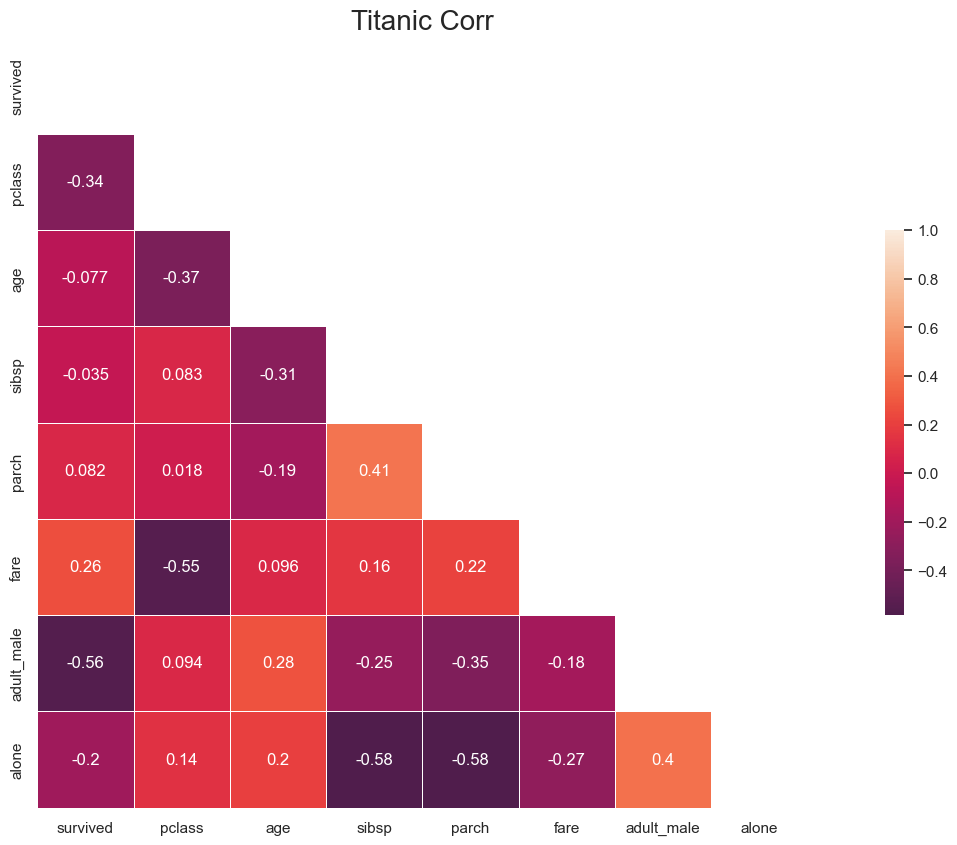

In [41]:
print_heatmap_corr(df, cmap='rocket', title='Titanic Corr')

## Pairplot & Scatter_matrix

El pairplot y el scatter_matrix son dos gráficos en los que podemos observar como se relacionan cada una de las variables de nuestro, hay que tener cuidado con este tipo de gráficos, no es recomen

In [42]:
iris = sns.load_dataset('iris')

In [43]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


En seaborn tenemos el método pairplot que recibe como parámetro un dataframe

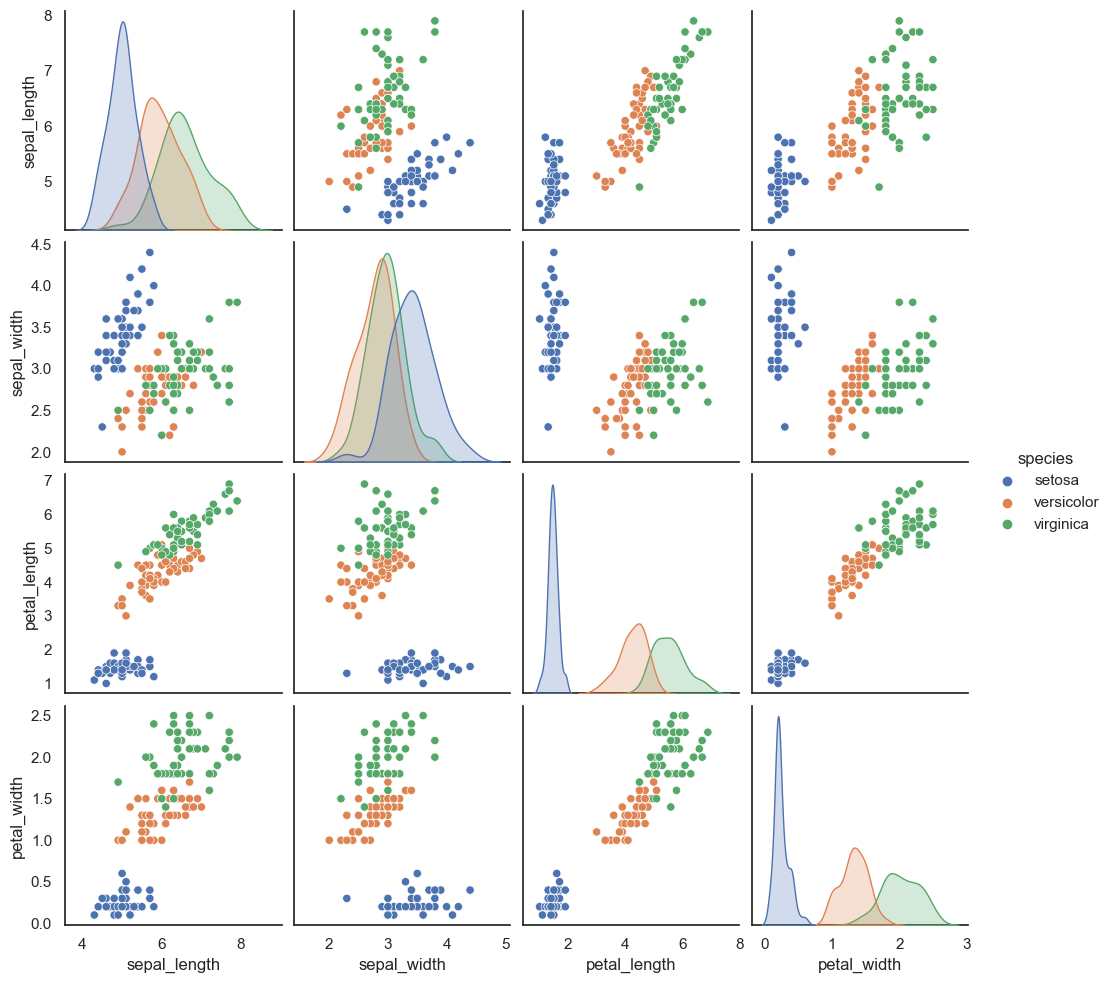

In [44]:
sns.pairplot(data=iris, hue='species');

En pandas tenemos el método scatter_matrix que básicamente hace lo mismo que el método pairplot de seaborn

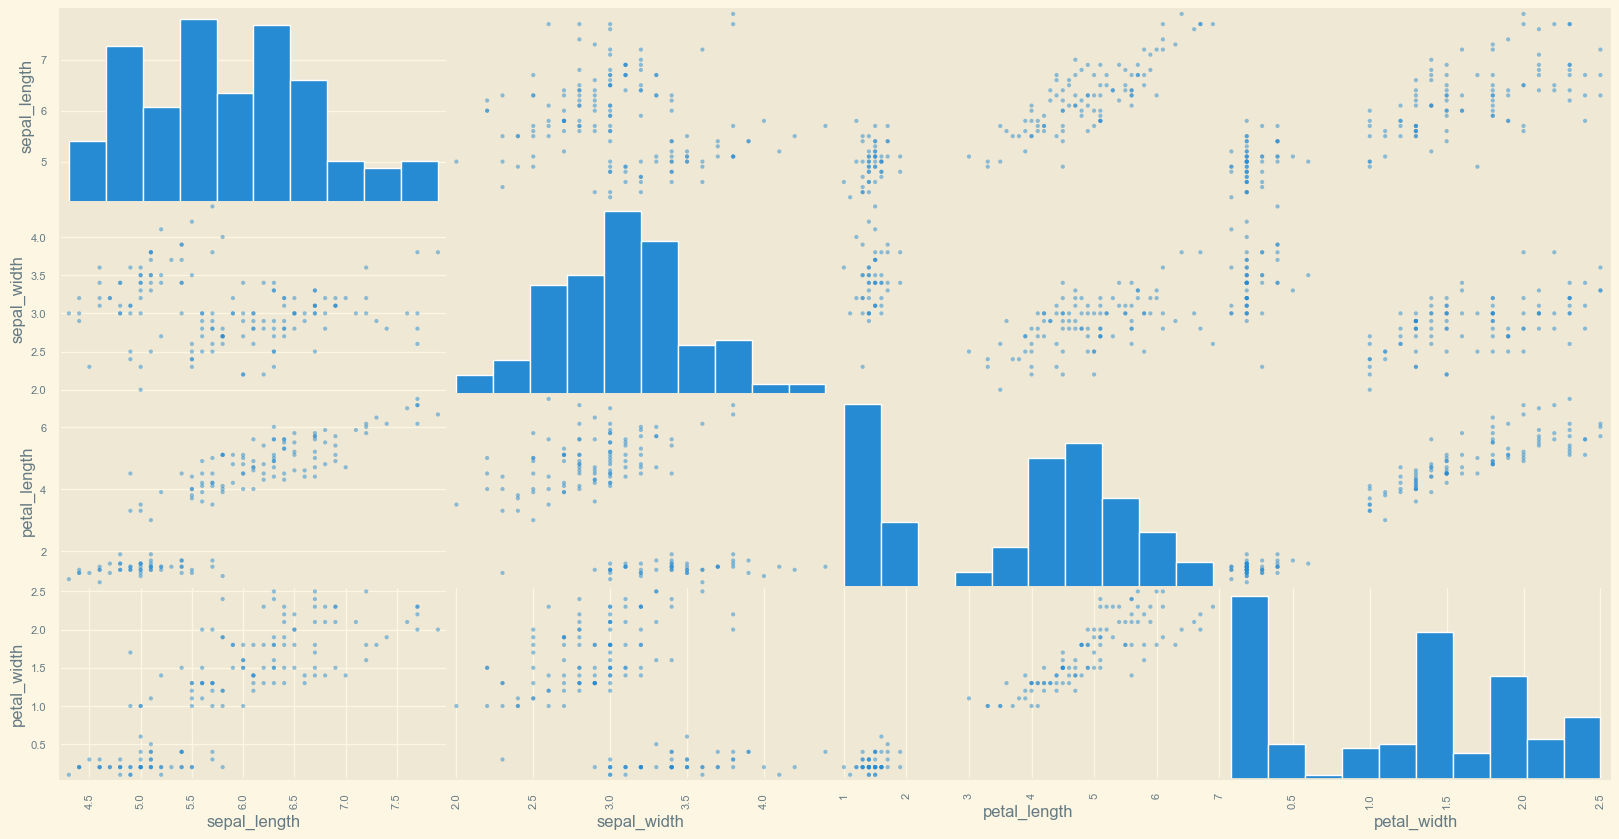

In [45]:
plt.style.use('Solarize_Light2')
pd.plotting.scatter_matrix(iris, grid=True);

## Subplots

La idea de los subplots es mostrar diferentes gráficos de forma continuada, para ello creamos una variable en forma de matriz, que a su vez dividirá la pantalla para mostar tantos gráficos como valores le hayamos asignado a dicha matriz.

In [46]:
df.columns[1:4]

Index(['pclass', 'sex', 'age'], dtype='object')

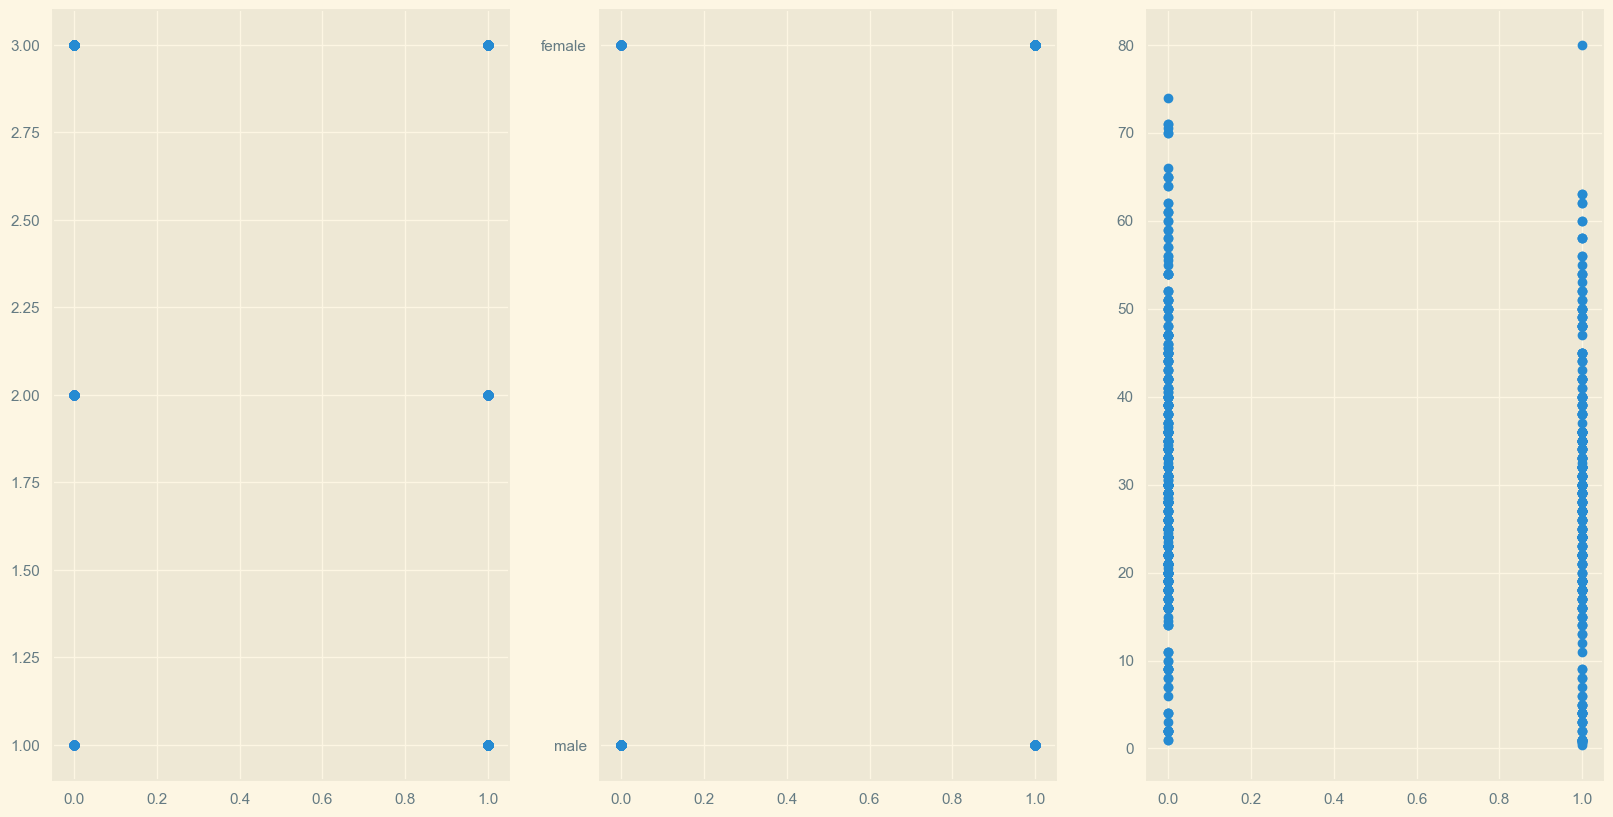

In [47]:
fig, ax = plt.subplots(1,3) # generamos una matriz de 3 columnas y una fila

for i, col in enumerate(df.columns[1:4]):
    ax[i].scatter(x=df.survived, y=df[col])
    

Con FacetGrid, este método lo que hace es crear un gráfico para cada una de las posibles combinaciones entre dos variables categóricas

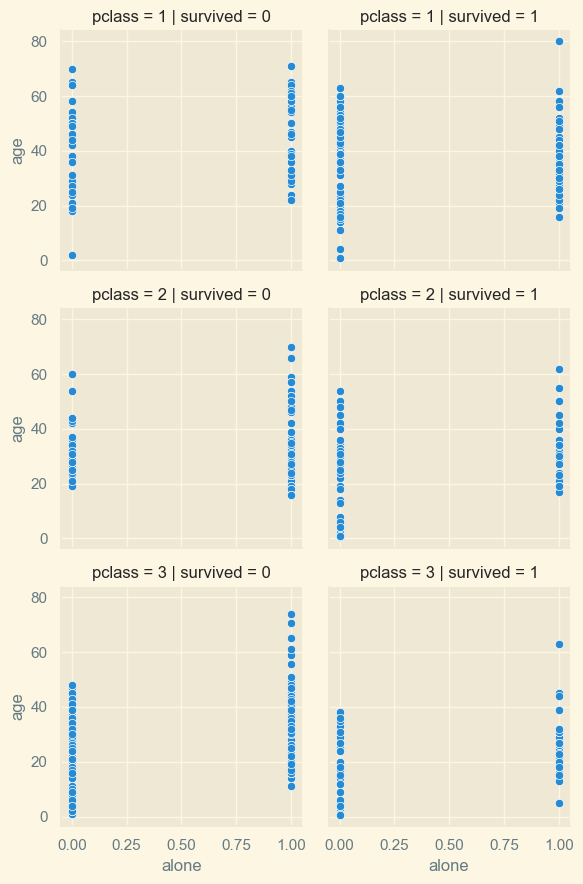

In [49]:
g = sns.FacetGrid(df, col='survived', row='pclass')
g.map(sns.scatterplot, 'alone', 'age');